# This notebook loads trajectories of a Kerr system in the qubit regime and applies machine learning algorithms to learn about the manifold the trajectory spans.

In [1]:
Regime = "kerr_qubit" ## used to load appropraite file

#  loading trajectory and using manifold my diffusion map script.

In [2]:
## load trajectory data from file
import pickle

## diffusion maps
from diffusion_maps import run_diffusion_map

## numerical
import numpy as np

## plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm

In [3]:
def show_colorbar(x_index, name):
    ## show color scheme
    # http://matplotlib.org/examples/color/colormaps_reference.html

    gradient = np.linspace(0, 1, x_index)
    gradient = np.vstack((gradient, gradient))

    fig, axes = plt.subplots(figsize=(24,2))
    axes.set_title( ' colormaps', fontsize=14)
    axes.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))

    plt.show()

In [147]:
def colored_3d_plot(data_ltsa_):
    ## Figure 
    fig = plt.figure(figsize=(24,20))
    ax = fig.add_subplot(111, projection='3d')
    to_plot_=[[x[i] for x in data_ltsa_] for i in xrange(0,3)]

    x_index = len(np.asarray(to_plot_).T)/params['Ntraj']

    color_list = np.concatenate([np.linspace(0, 1, x_index)] * params['Ntraj'])
    colors = cm.jet(color_list)
    ax.scatter(*to_plot_,c=colors)

    show_colorbar(x_index,'jet')

## Diffusion maps

In [188]:
## load trajectory data from file
pkl_file = open('./trajectory_data/'+ Regime +'.pkl', 'rb')
(params,SLH,data_traj) = pickle.load(pkl_file)
pkl_file.close()

## sample 
traj1 = data_traj[0::100]

In [189]:
## Paramters to use

diffusion_params = {}

diffusion_params["gaussian_epsilon"] = 0.1 ## width of Gaussian kernel.
diffusion_params["num_neighbors"] = 100 ## cutoff of number of neighbors, if using epsilon_cutoff
diffusion_params["alpha"] = 1. ## coefficient to use for diffusion maps. See the wikipedia article.

diffusion_params["data_size"] = 1000 ## total number of points
diffusion_params["eigen_dims"] = 4 ## number of lower dimensions to consider, i.e. number of eigenvectors to find.

using num_neighbors  


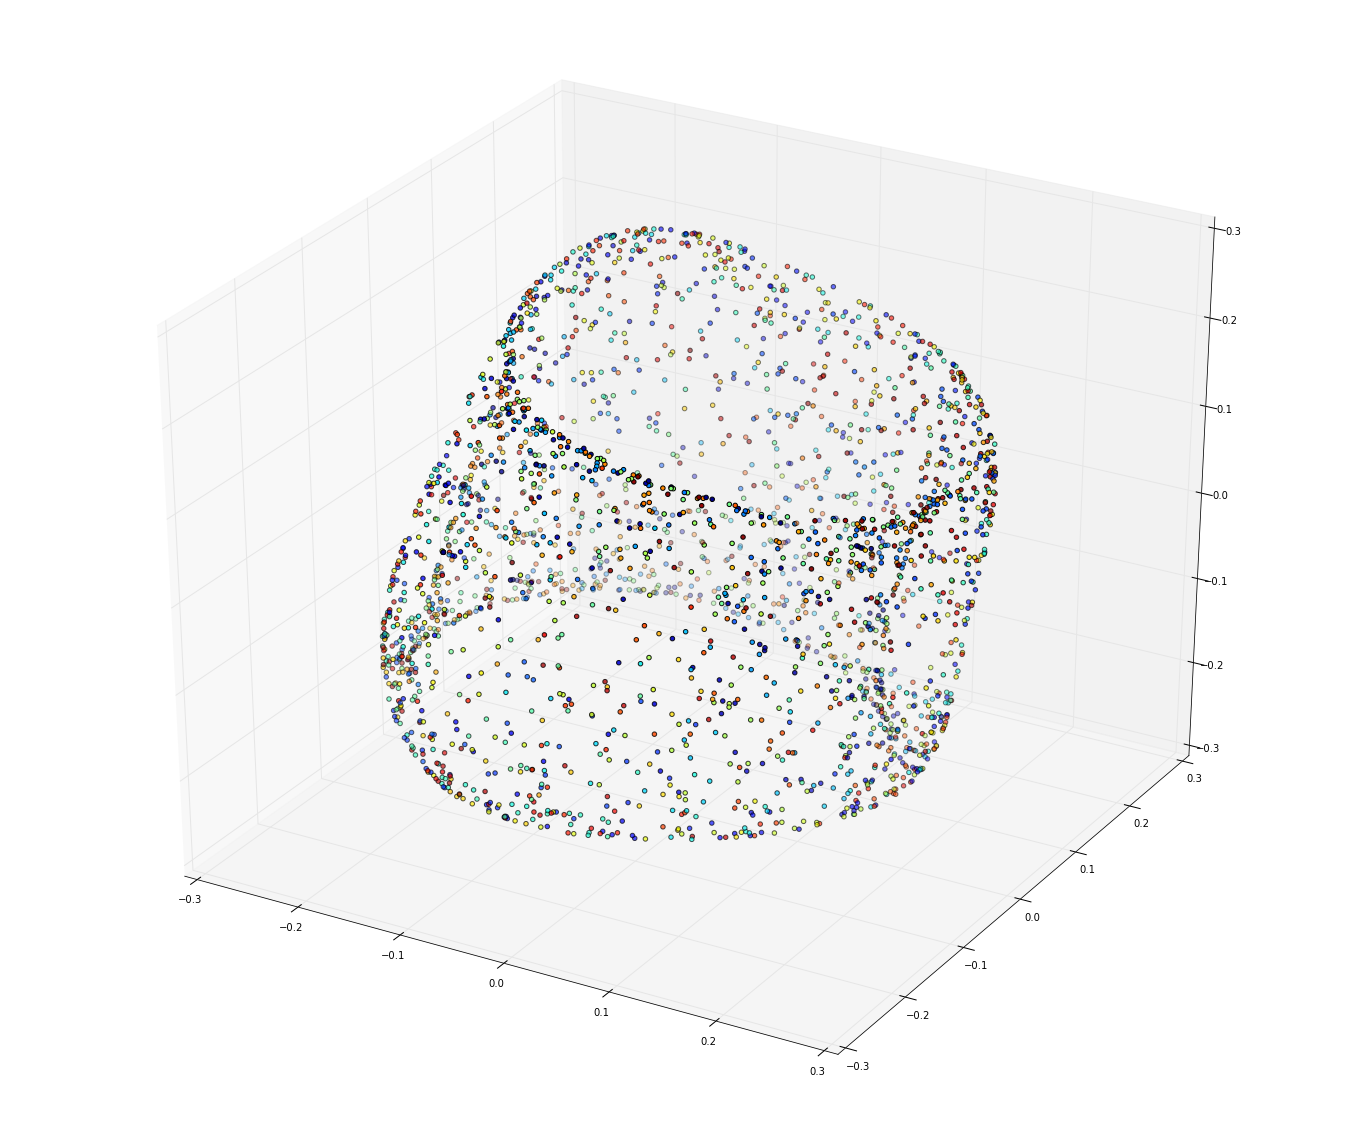

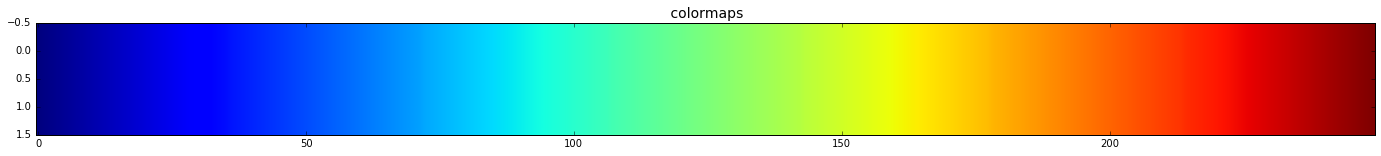

In [190]:
## Using the euclidean (default) metric

e_vals, e_vecs = run_diffusion_map(traj1.tolist(),
                                   diffusion_params,
                                   symmetric=True,
                                   neighbor_selection = "num_neighbors")
colored_3d_plot(e_vecs.T[1:].T)

## The shape above resembles the Hopf fibration. This can be explained if the states with the global phase removed lie on a circle on the Bloch sphere. See http://nilesjohnson.net/hopf.html

## Next, let's color the same plot by the photon number.

In [186]:
def plot_by_operator(data,traj1,operator = "photon_num"):
    
    if operator == "photon_num":
        num = np.asmatrix(np.diag([i for i in range(params['Nfock'])]*2))
        num_expects = np.asarray([(i*num*i.T)[0,0] for i in np.asmatrix(traj1)])
    else:
        raise ValueError("operator type not implemented")
       
    ## sort data by expected photon number
    num_expects_indices = [(i,n) for i,n in enumerate(num_expects)]
    sorted_num_expects = sorted(num_expects_indices, key = lambda z: z[1])
    data_by_num = [data[i[0]] for i in sorted_num_expects]

    ## Figure 
    fig = plt.figure(figsize=(24,20))
    ax = fig.add_subplot(111, projection='3d')
    to_plot_=[[x[i] for x in data_by_num] for i in xrange(0,3)]

    ## color bar
    x_index = len(np.asarray(to_plot_).T)
    color_list = np.concatenate([np.linspace(0, 1, x_index)] )
    colors = cm.jet(color_list)
    ax.scatter(*np.asarray(to_plot_),c=colors)
    show_colorbar(x_index,'jet')

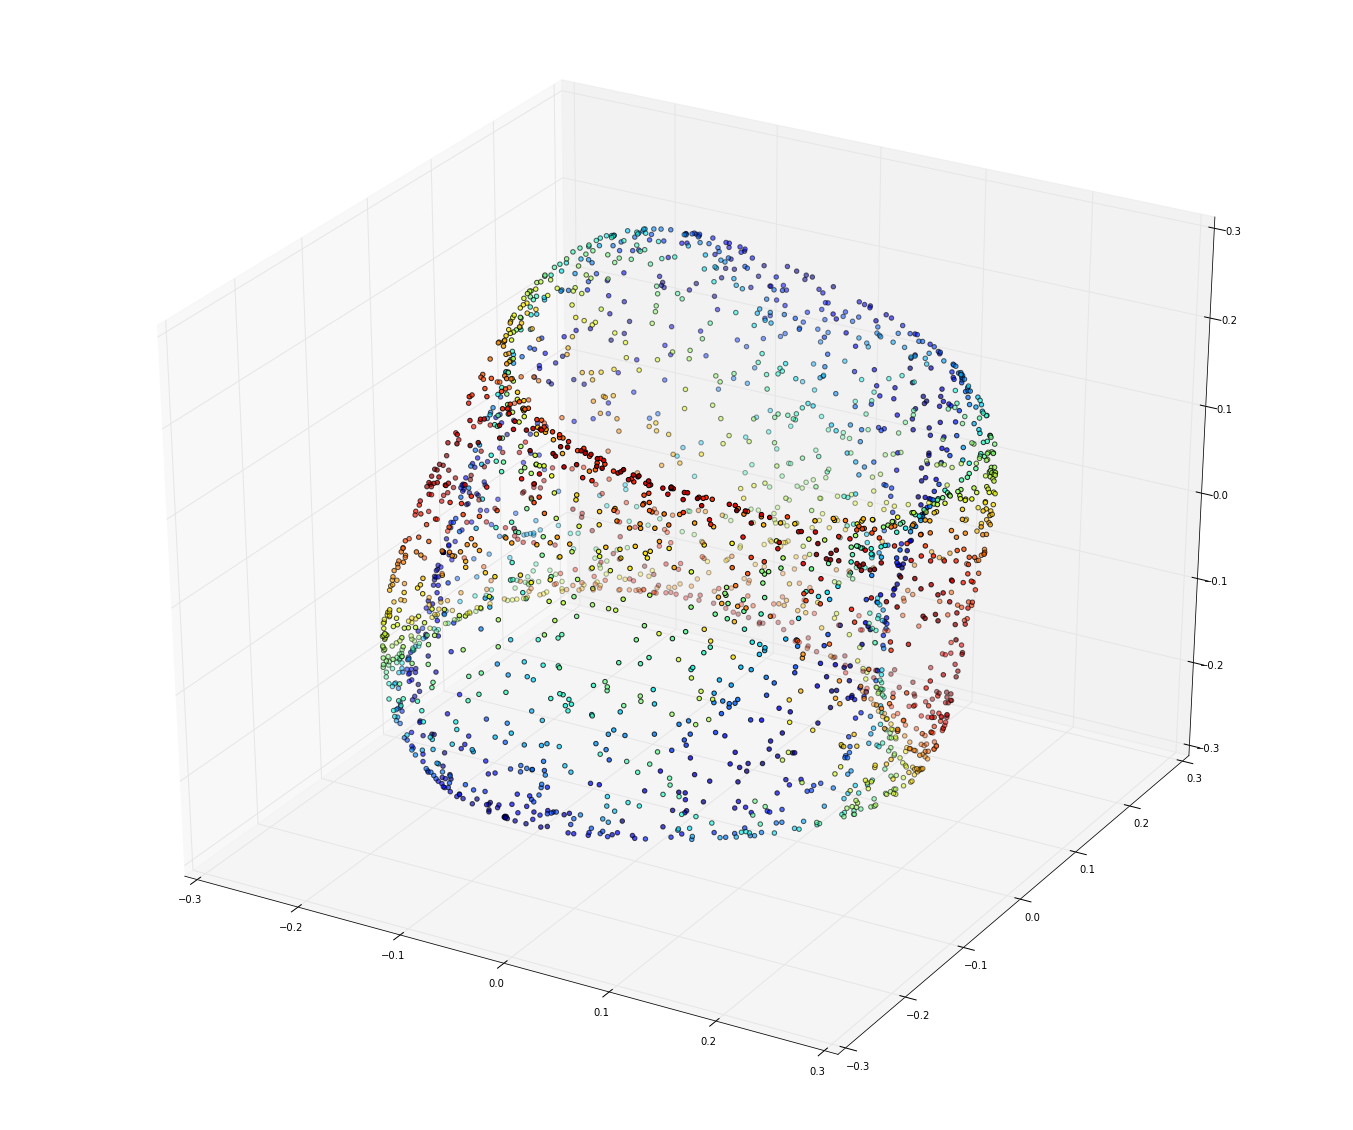

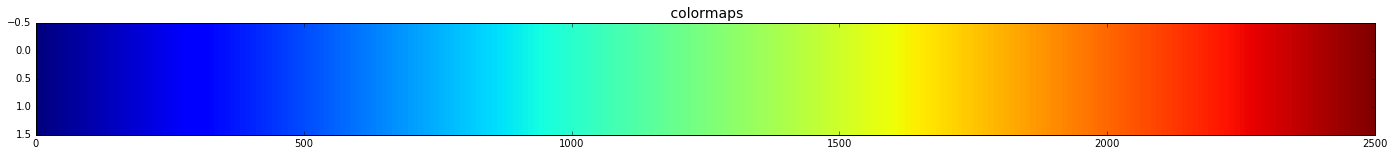

In [191]:
plot_by_operator(e_vecs.T[1:].T,traj1)

# Fubini-Study metric below!

In [157]:
## Using the euclidean (default) metric
diffusion_params["eigen_dims"] = 4 ## number of lower dimensions to consider, i.e. number of eigenvectors to find.

e_vals, e_vecs = run_diffusion_map(traj1.tolist(),
                                   diffusion_params,
                                   symmetric=True,
                                   metric = "FS_metric",
                                   neighbor_selection = "num_neighbors")

using num_neighbors  


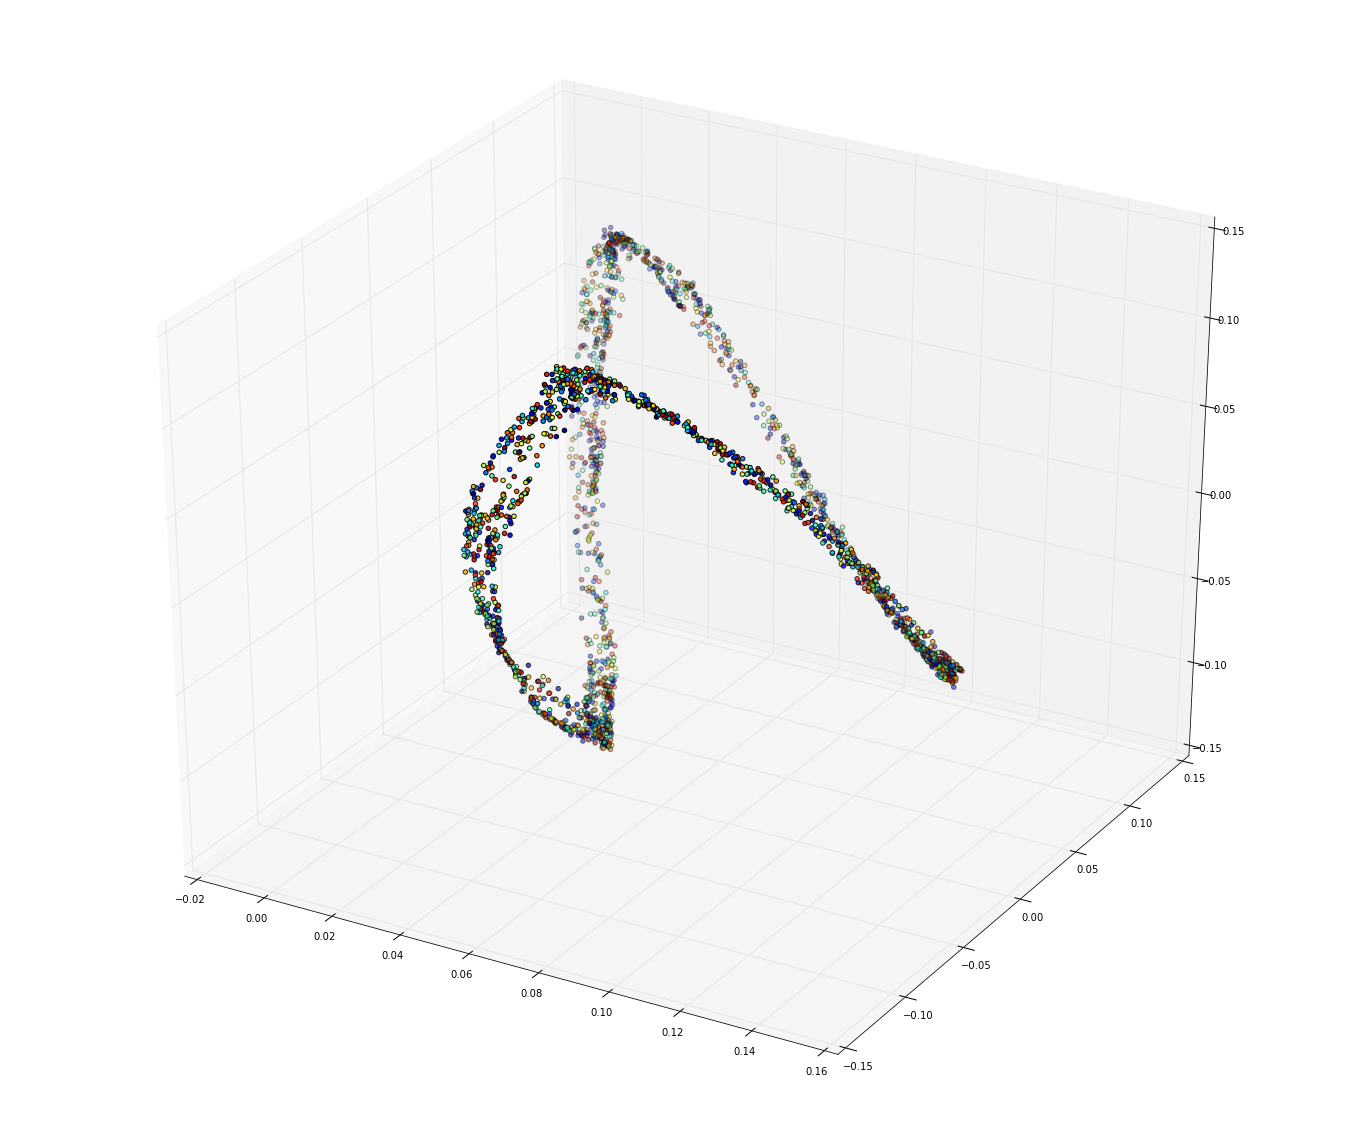

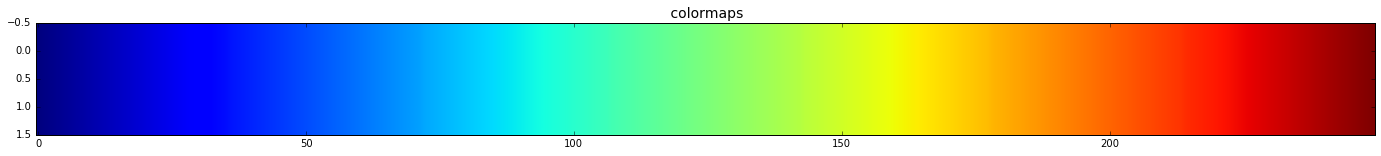

In [158]:
colored_3d_plot(e_vecs.T[1:].T)

## Diffusion maps down to a two-dimensional space (`eigen_dims` == 3)

In [181]:
def diffusion_map_2D_plot():
    diffusion_params["eigen_dims"] = 3 ## number of lower dimensions to consider, i.e. number of eigenvectors to find.

    e_vals, e_vecs = run_diffusion_map(traj1.tolist(),
                                       diffusion_params,
                                       symmetric=True,
                                       metric = "FS_metric",
                                       neighbor_selection = "num_neighbors")

    plt.scatter(*e_vecs[:,1:].T)

using num_neighbors  


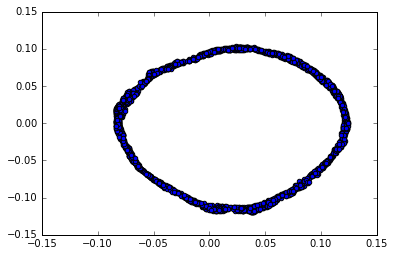

In [182]:
diffusion_params["gaussian_epsilon"] = 0.1
diffusion_map_2D_plot()

## Let's change the `gaussian_epsilon` parameter

using num_neighbors  


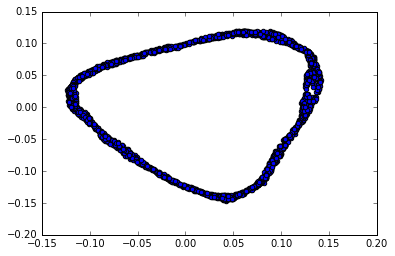

In [183]:
diffusion_params["gaussian_epsilon"] = 0.2
diffusion_map_2D_plot()

# What happens if we apply the algorithm at different times (to all trajectories). We split time to chunks of `slice_len`. 

In [ ]:
Ntraj = params['Ntraj']
duration = params['duration']

slice_len = 5000
trajs = np.split(data_traj,Ntraj)
traj_overtime = [np.concatenate([t[slice_len*i : slice_len*(i+1)] for t in trajs])[0::20] for i in range(int(duration/slice_len))]

In [184]:
def run_diffusion_maps_time_slices_plot_3d(metric = "FS_metric"):
    Ntraj = params['Ntraj']
    duration = params['duration']
    diffusion_params["eigen_dims"] = 4 ## number of lower dimensions to consider, i.e. number of eigenvectors to find.

    for t,traj1 in enumerate(traj_overtime):
        e_vals, e_vecs = run_diffusion_map(traj1.tolist(),
                                           diffusion_params,
                                           symmetric=True,
                                           metric = metric,
                                           neighbor_selection = "num_neighbors")

        data = e_vecs.T[1:].T

        ## figure
        colored_3d_plot(data)
        plt.show()

using num_neighbors  


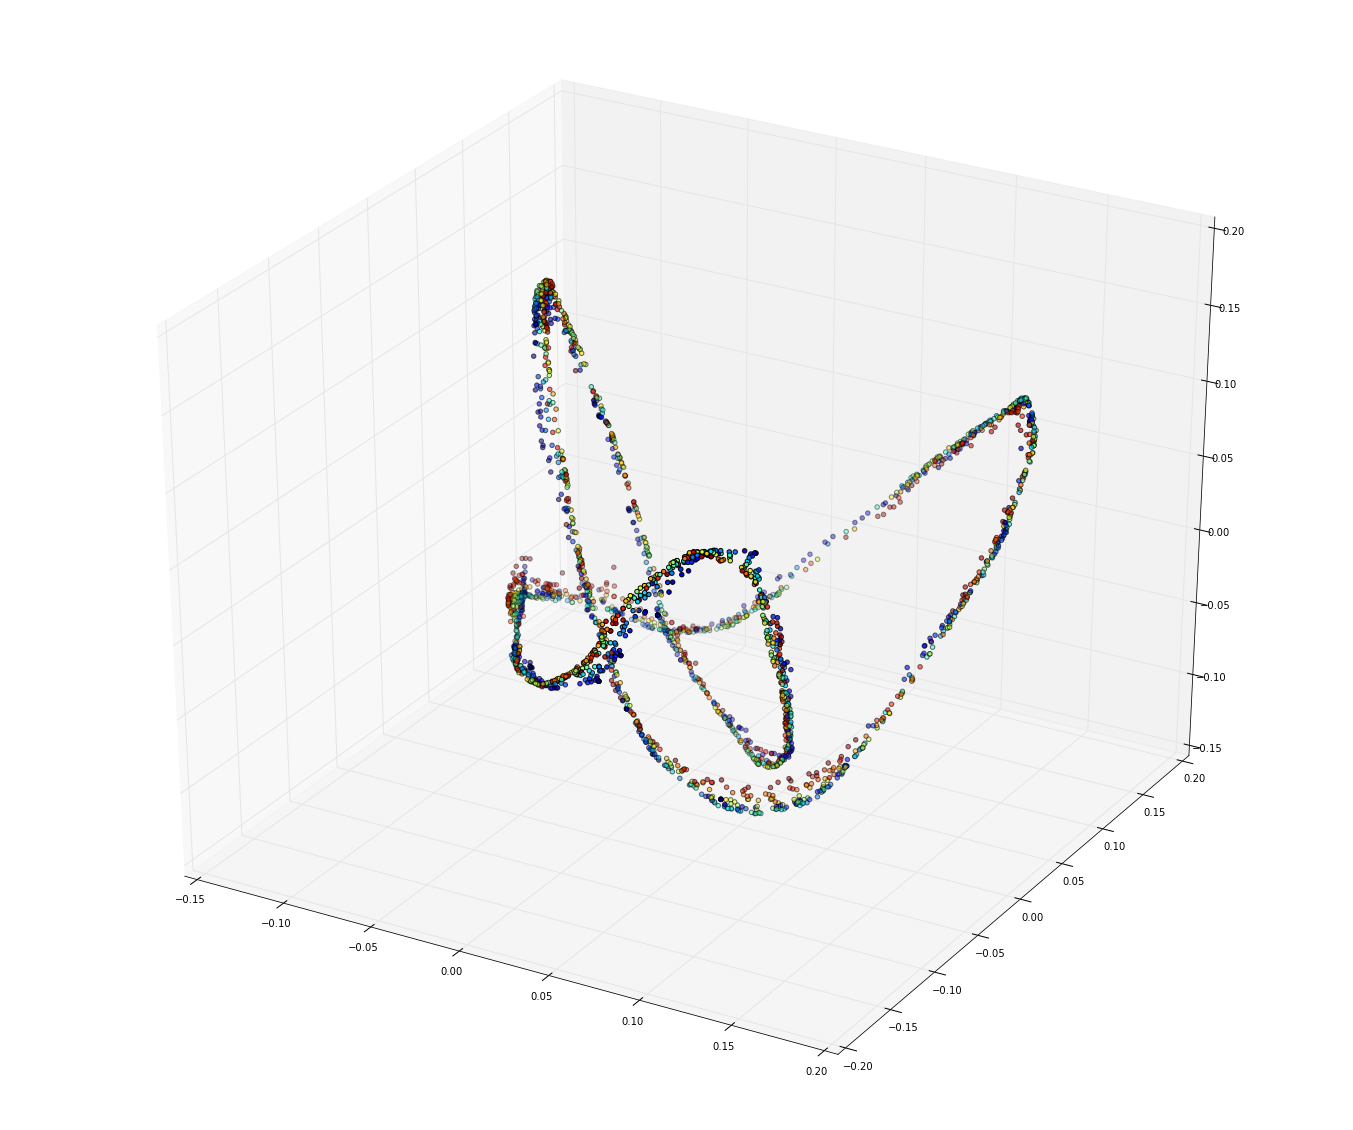

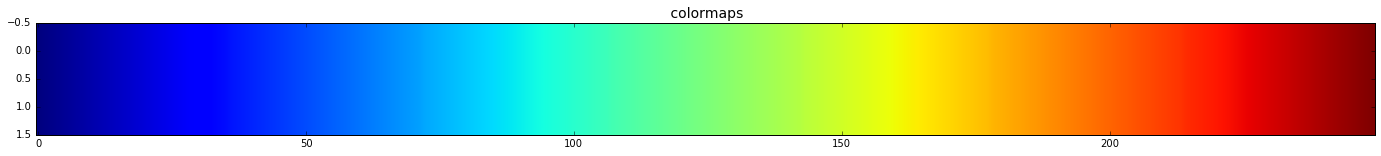

using num_neighbors  


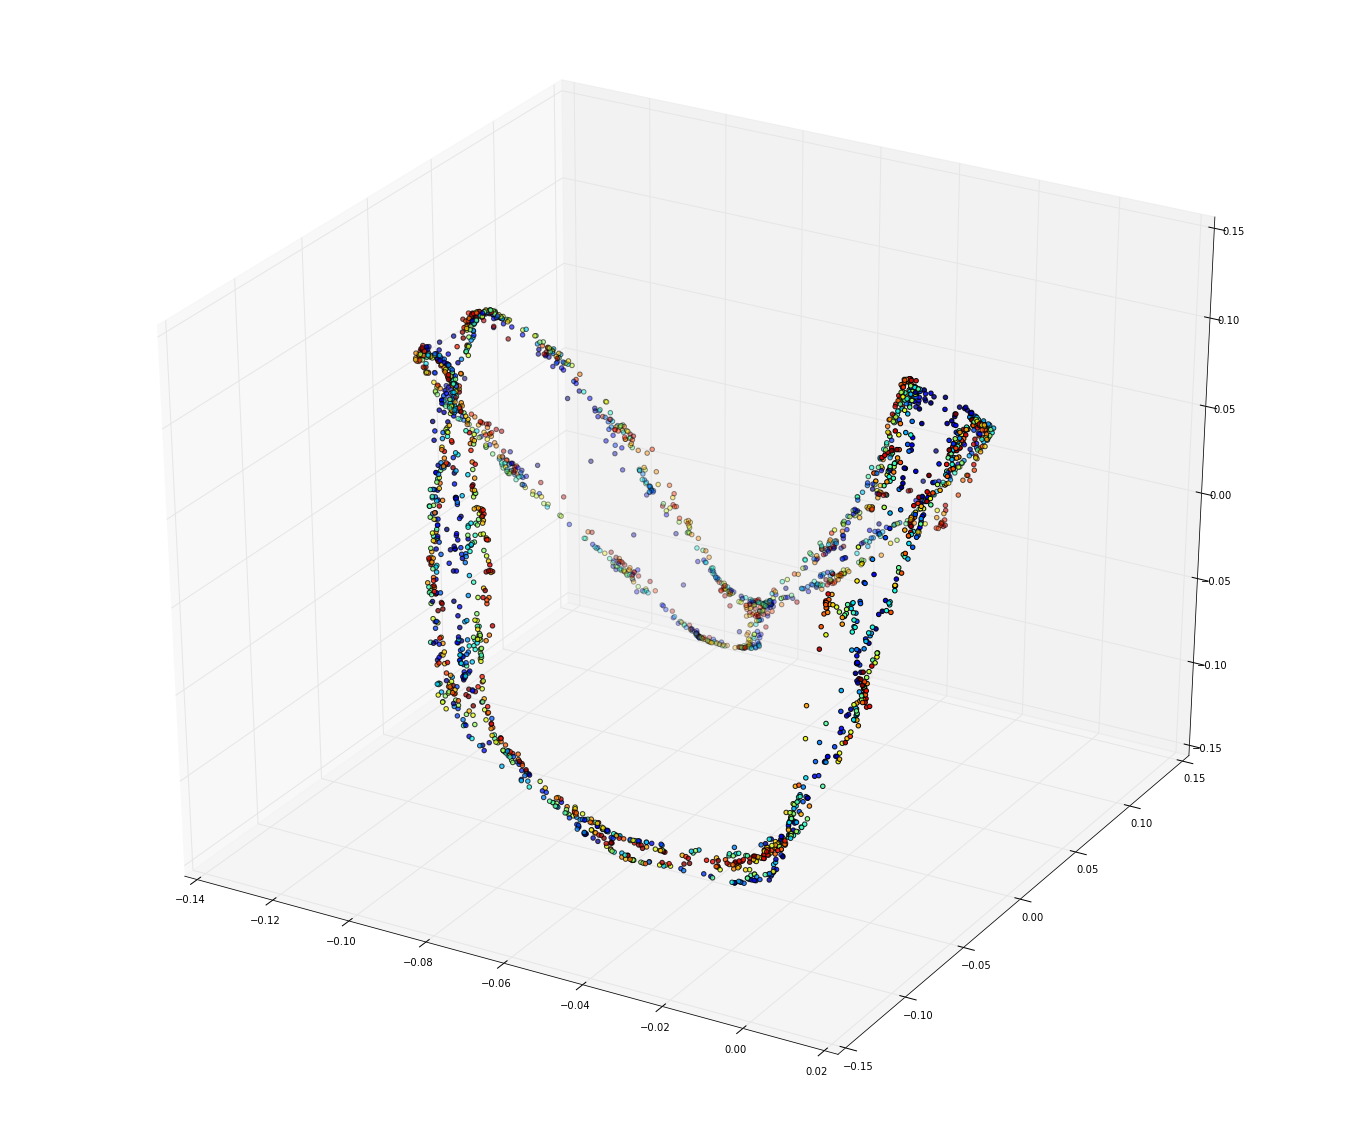

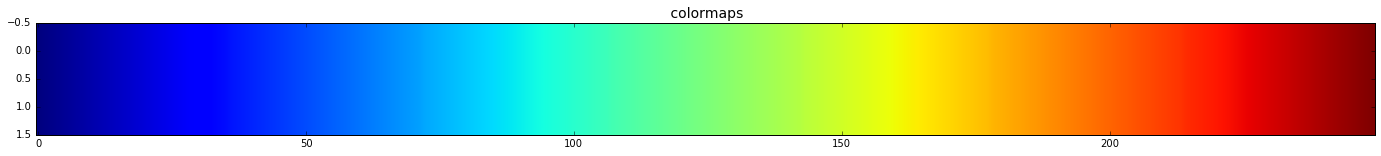

using num_neighbors  


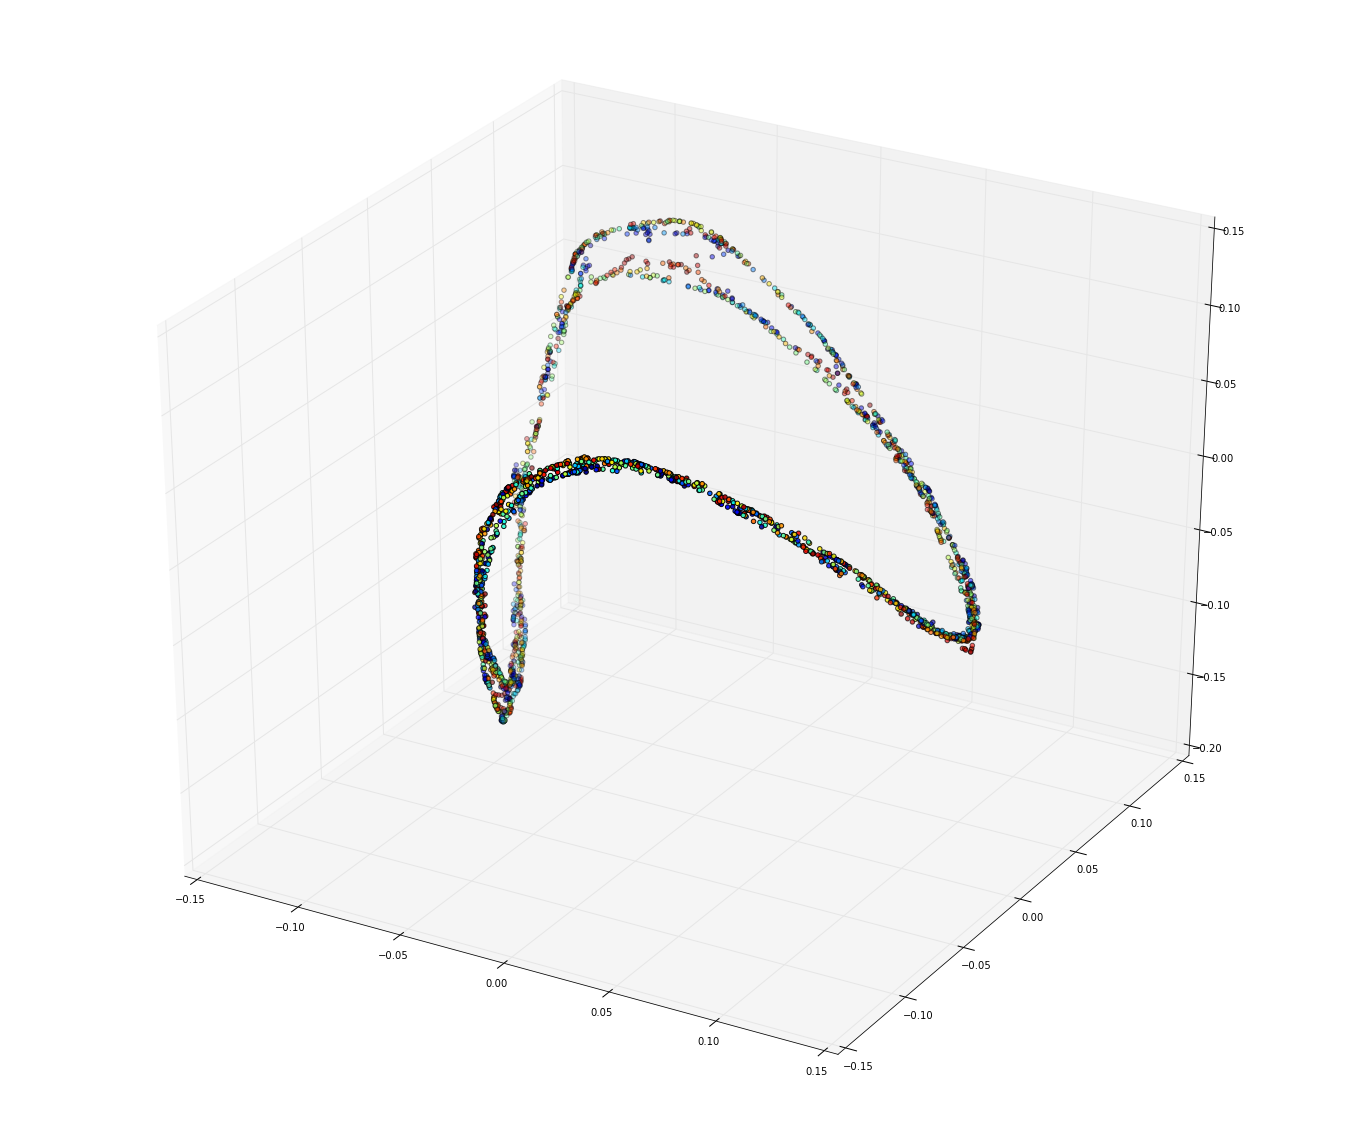

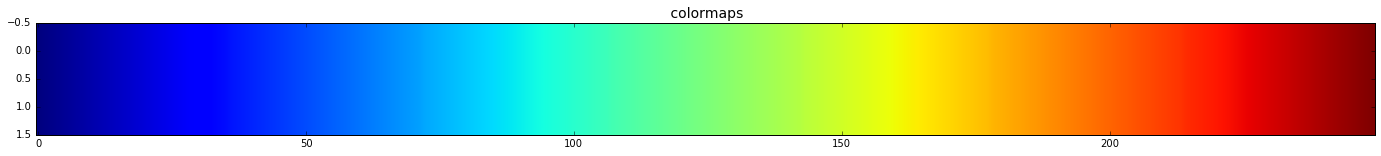

using num_neighbors  


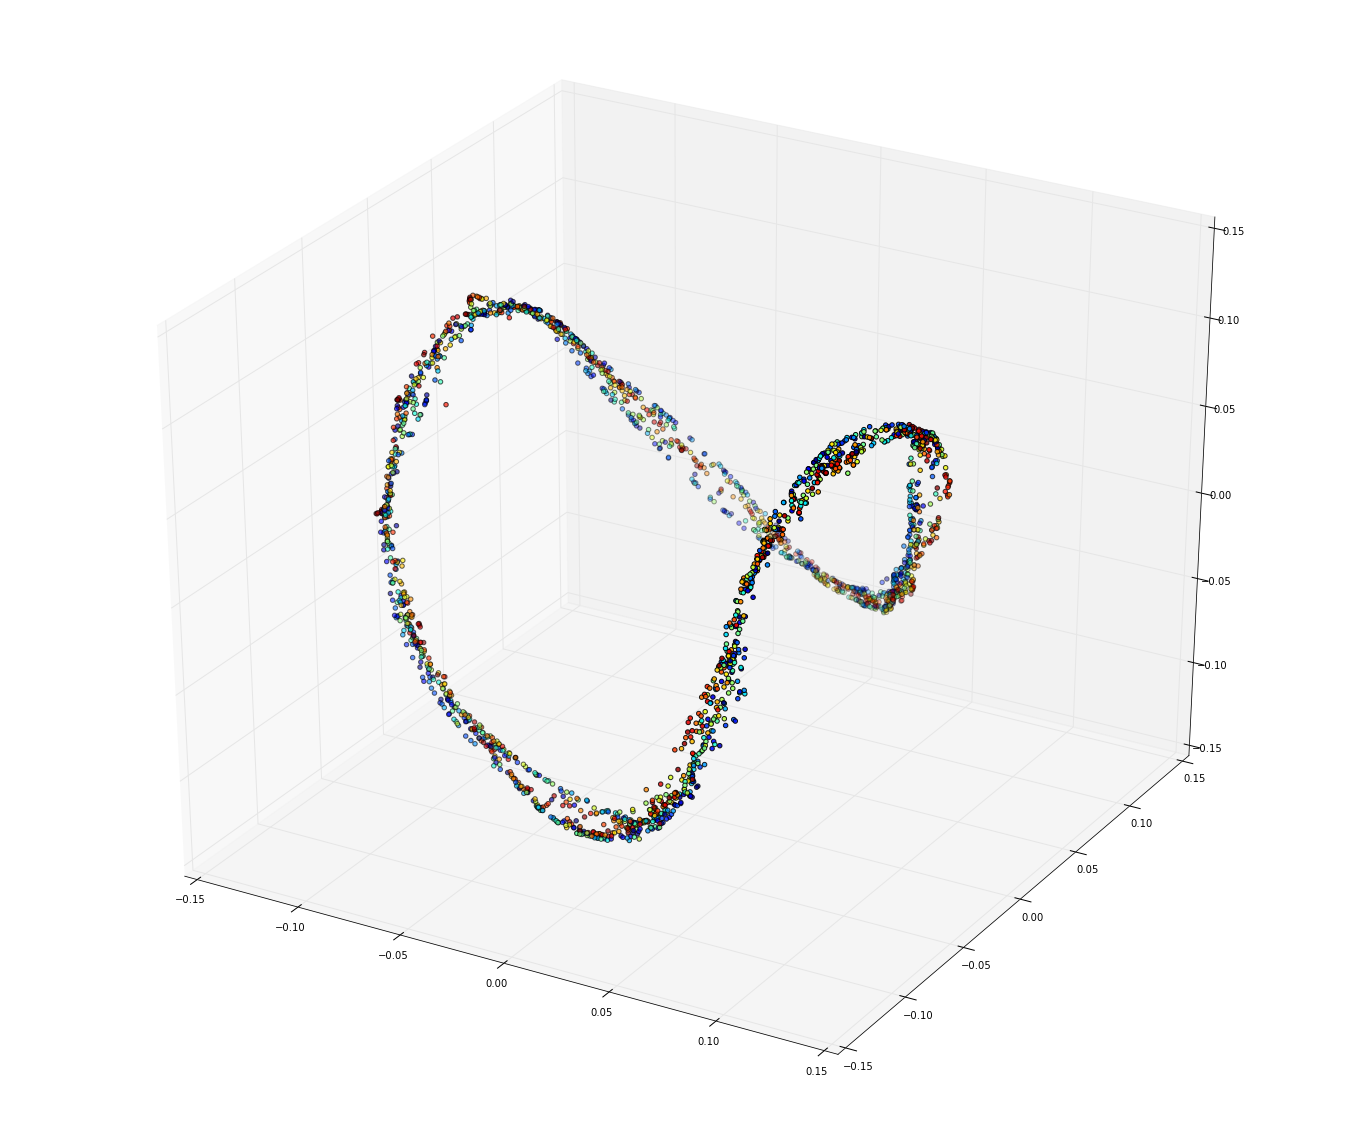

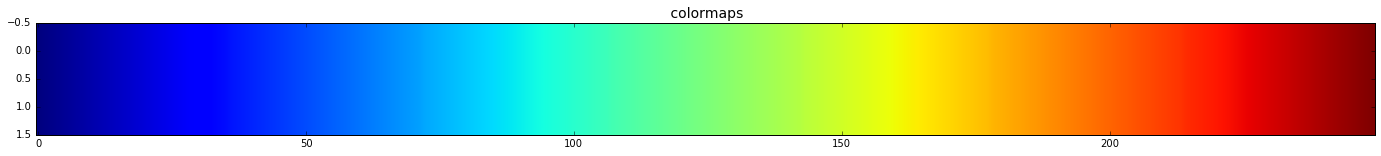

using num_neighbors  


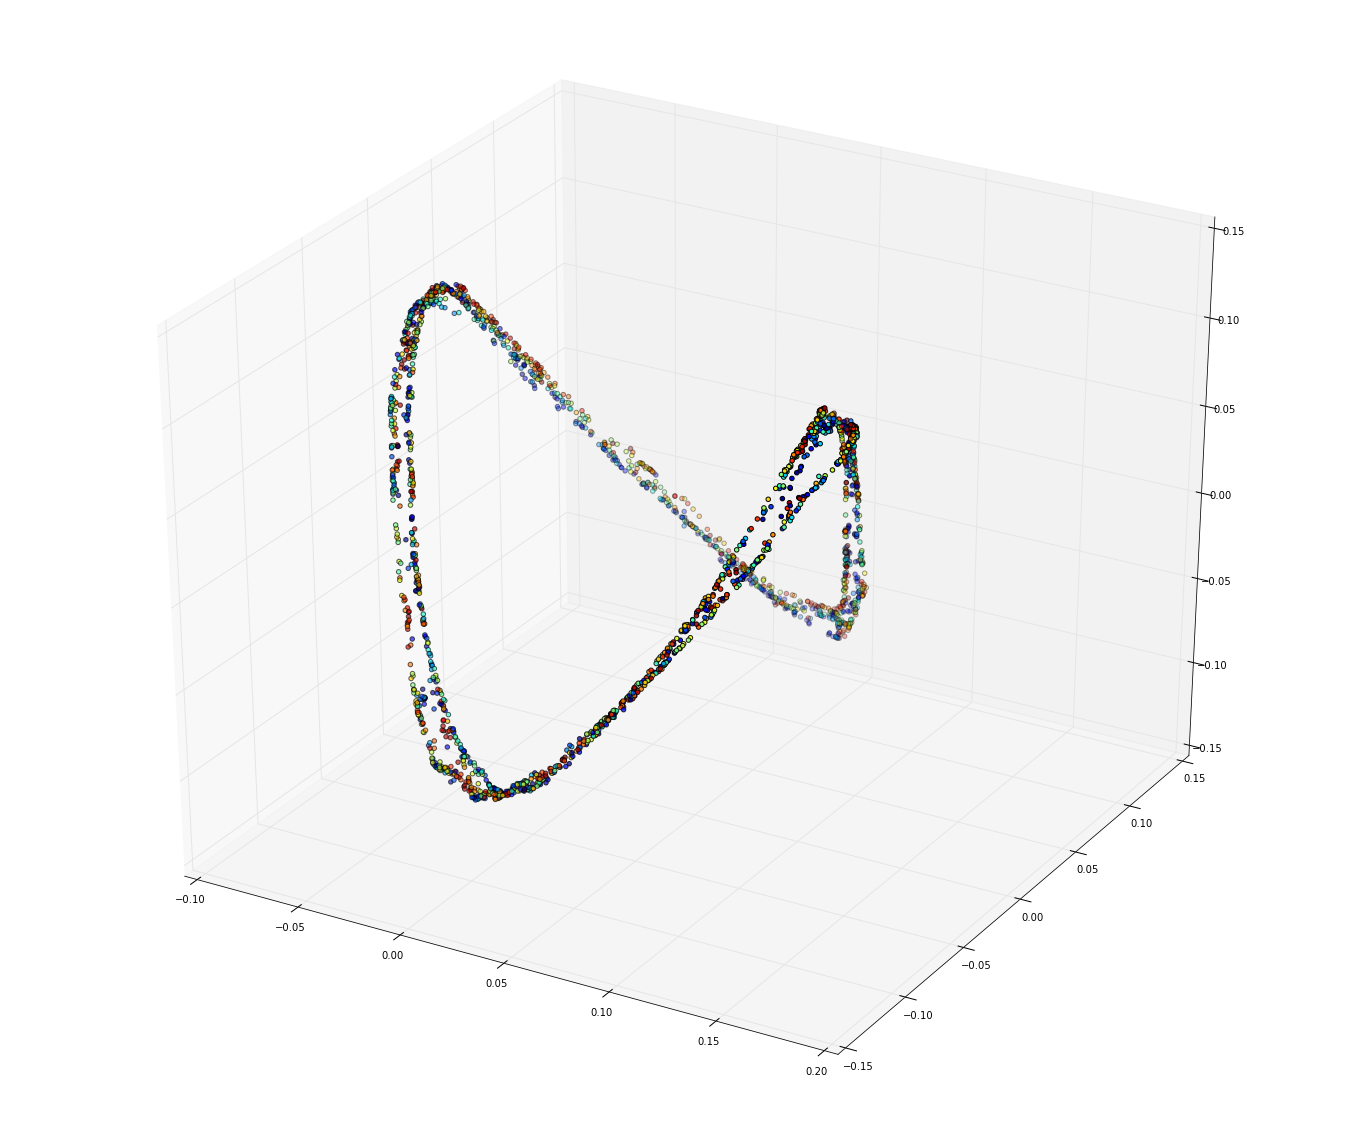

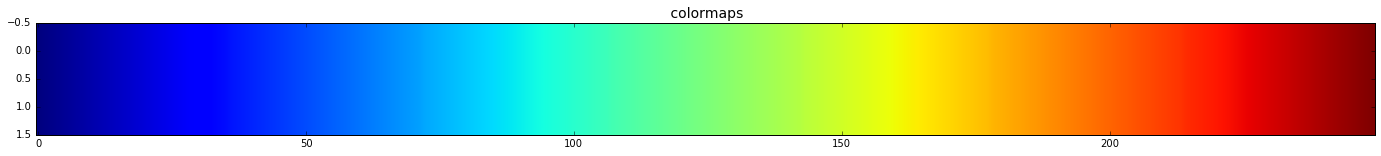

In [172]:
run_diffusion_maps_time_slices_plot_3d()

using num_neighbors  


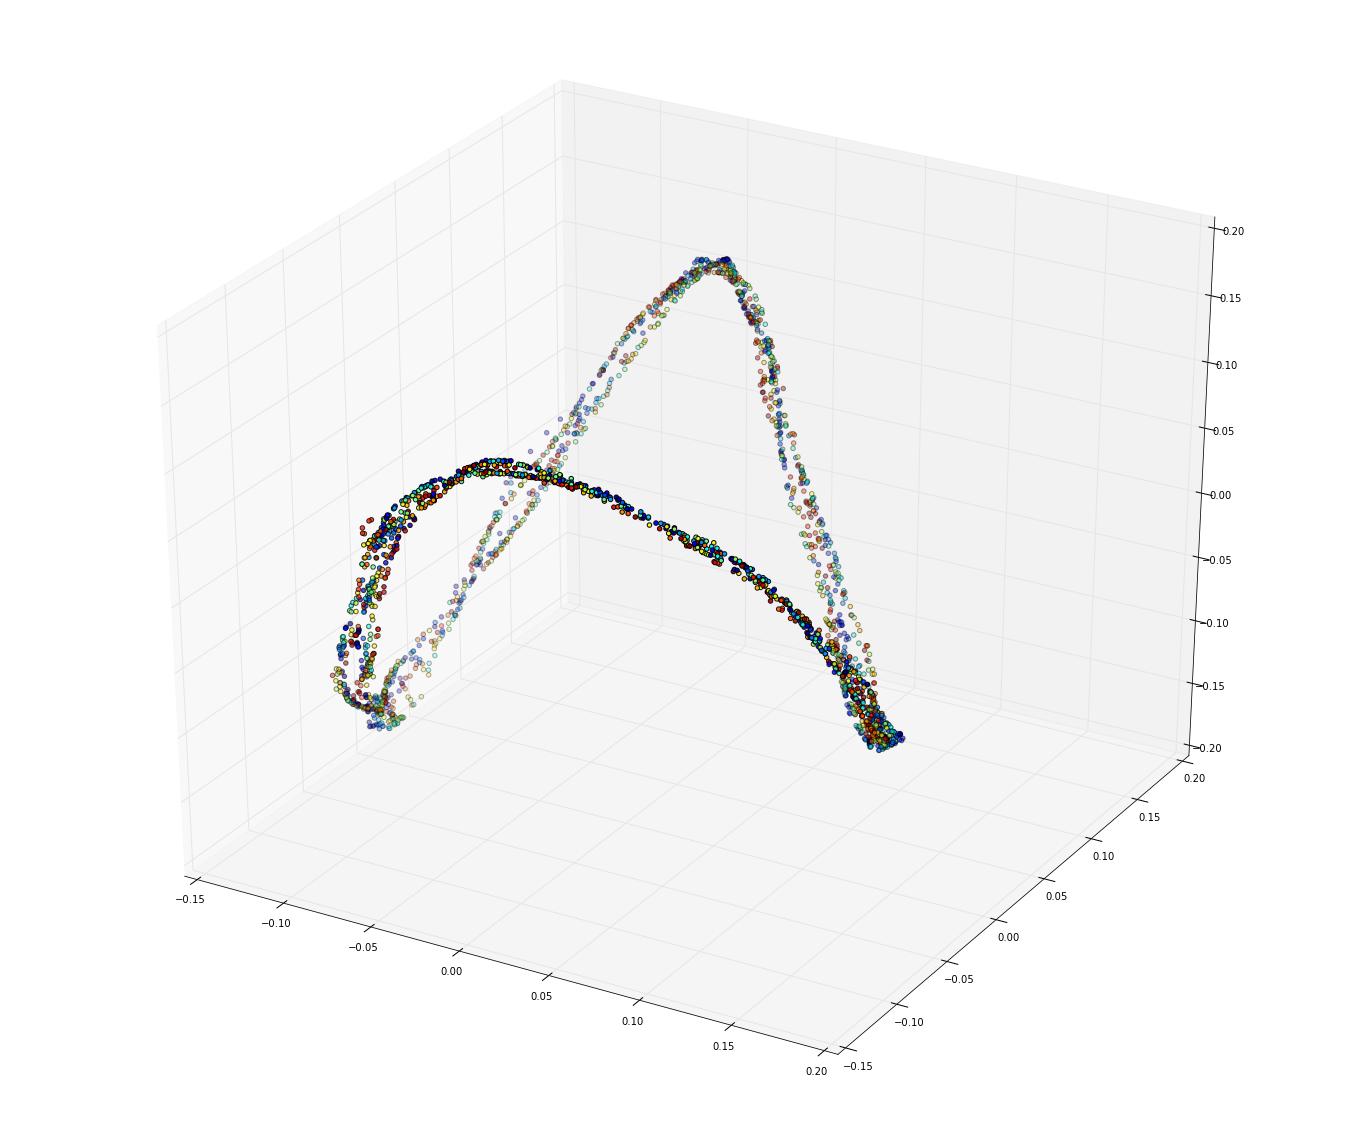

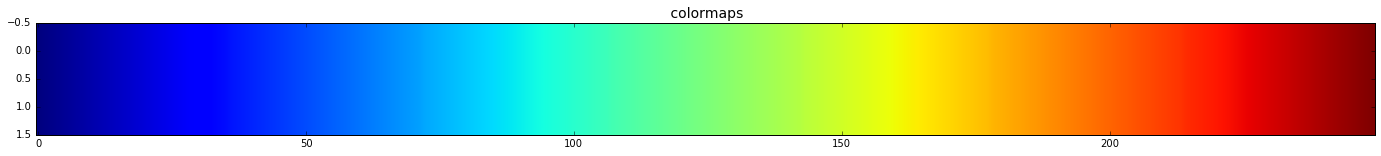

using num_neighbors  


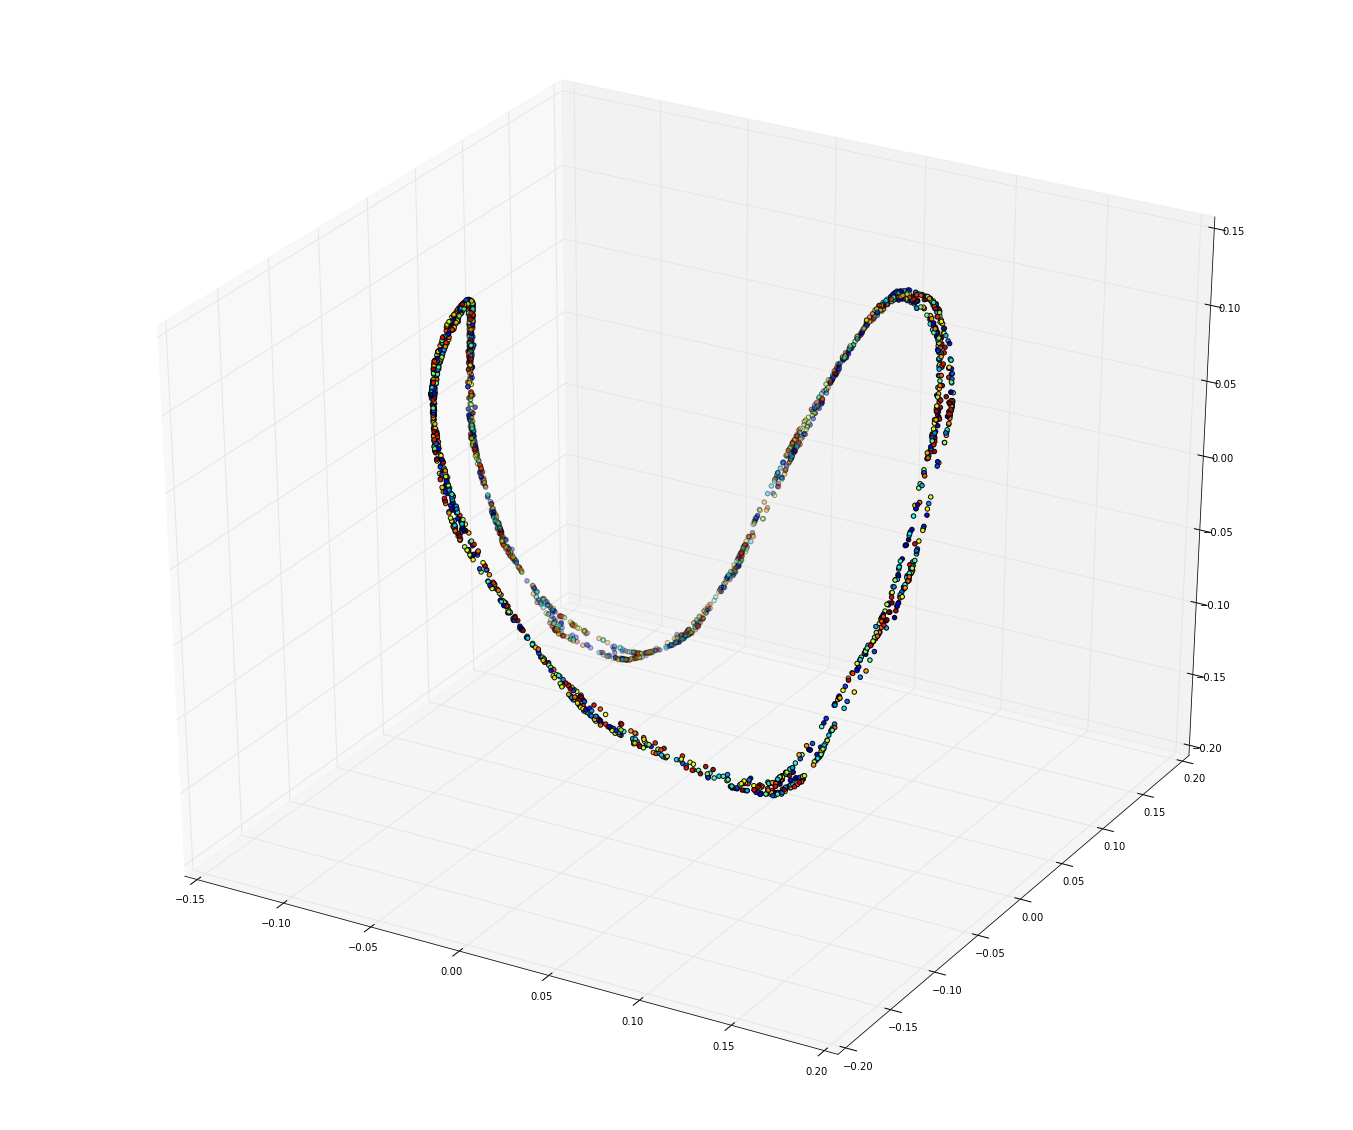

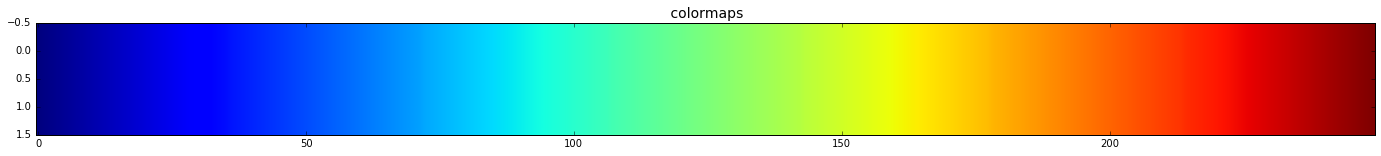

using num_neighbors  


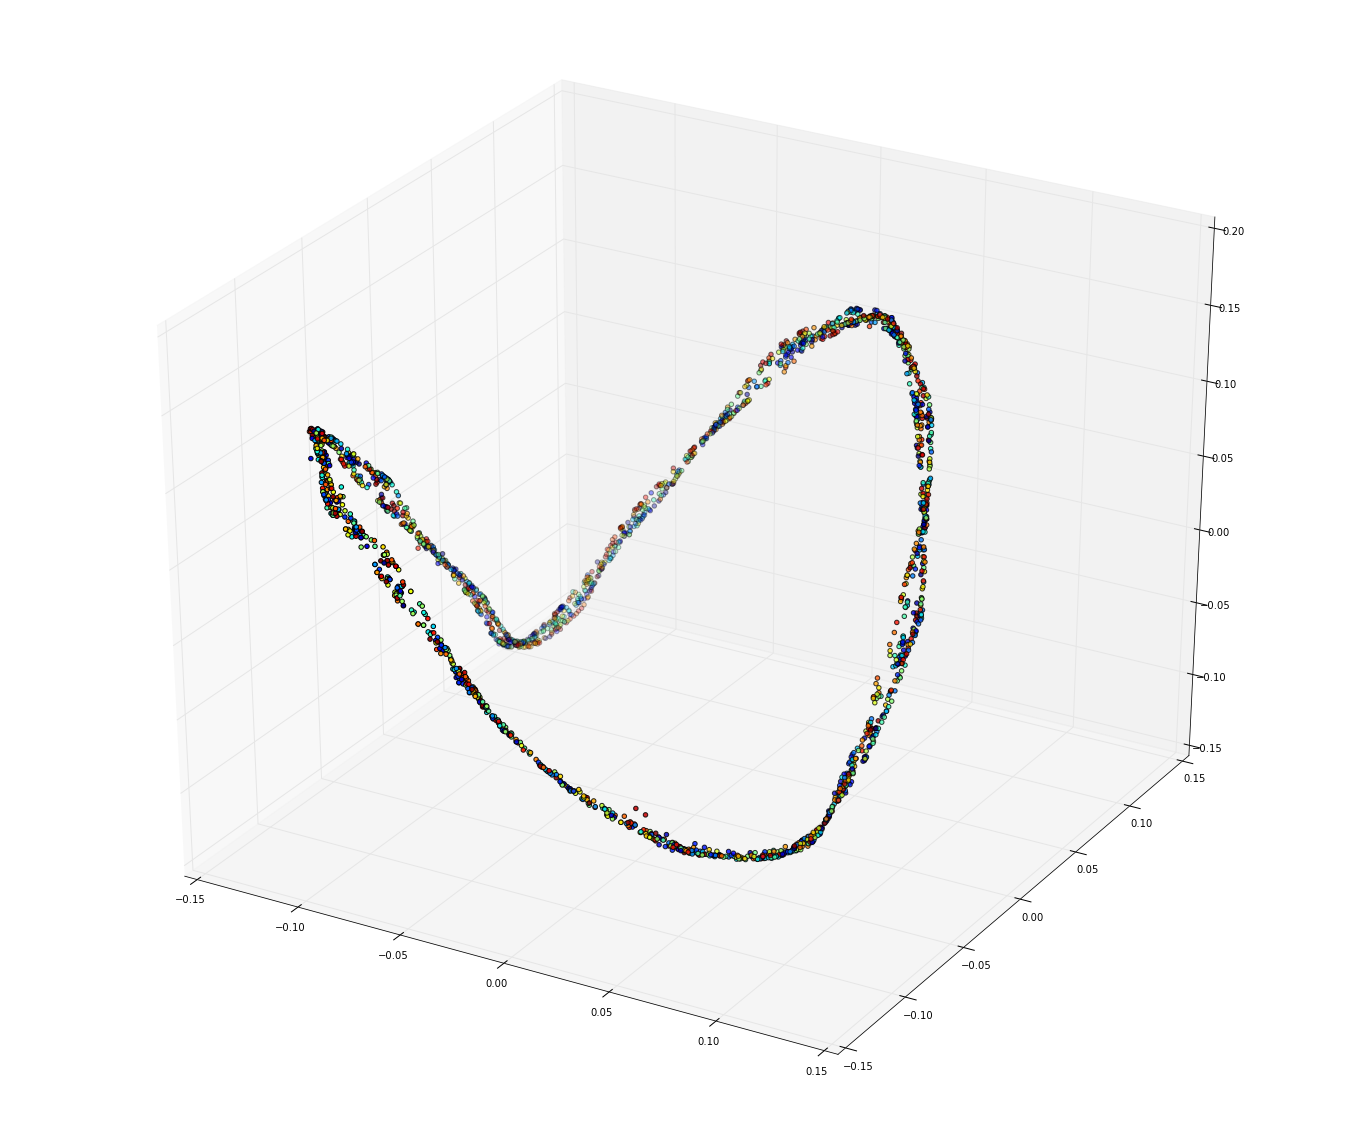

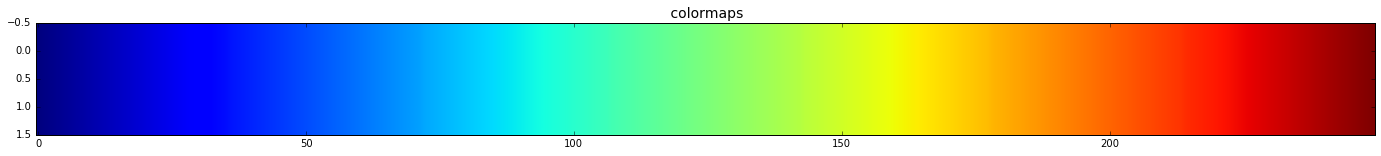

using num_neighbors  


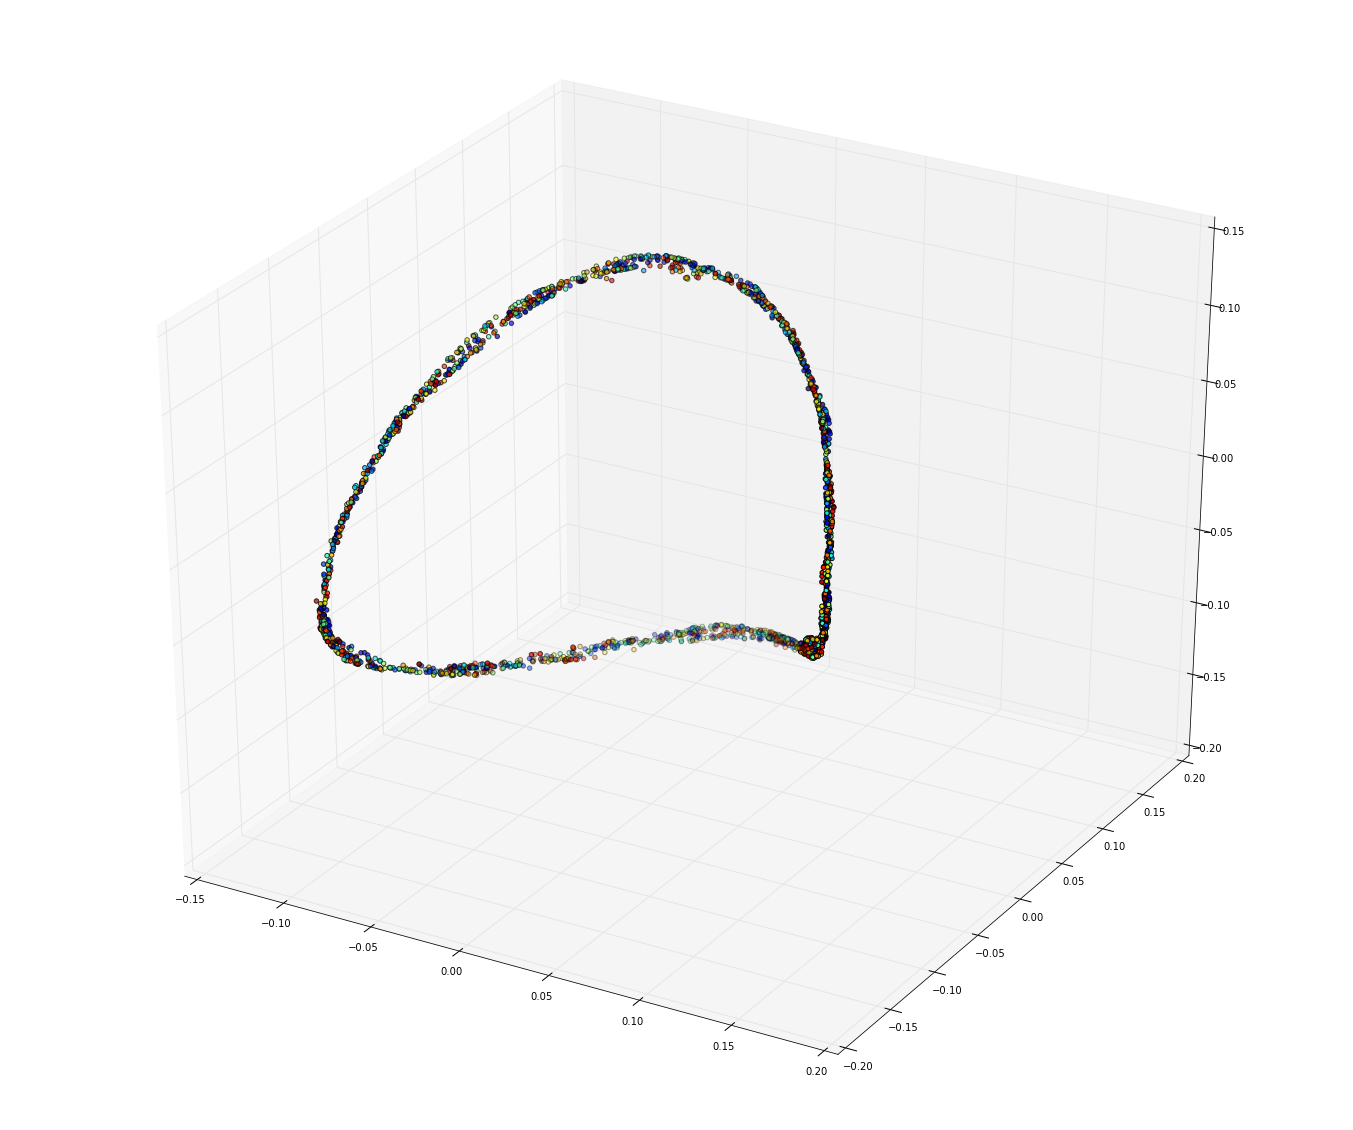

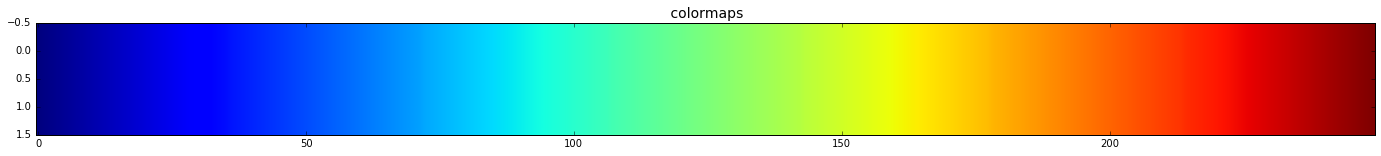

using num_neighbors  


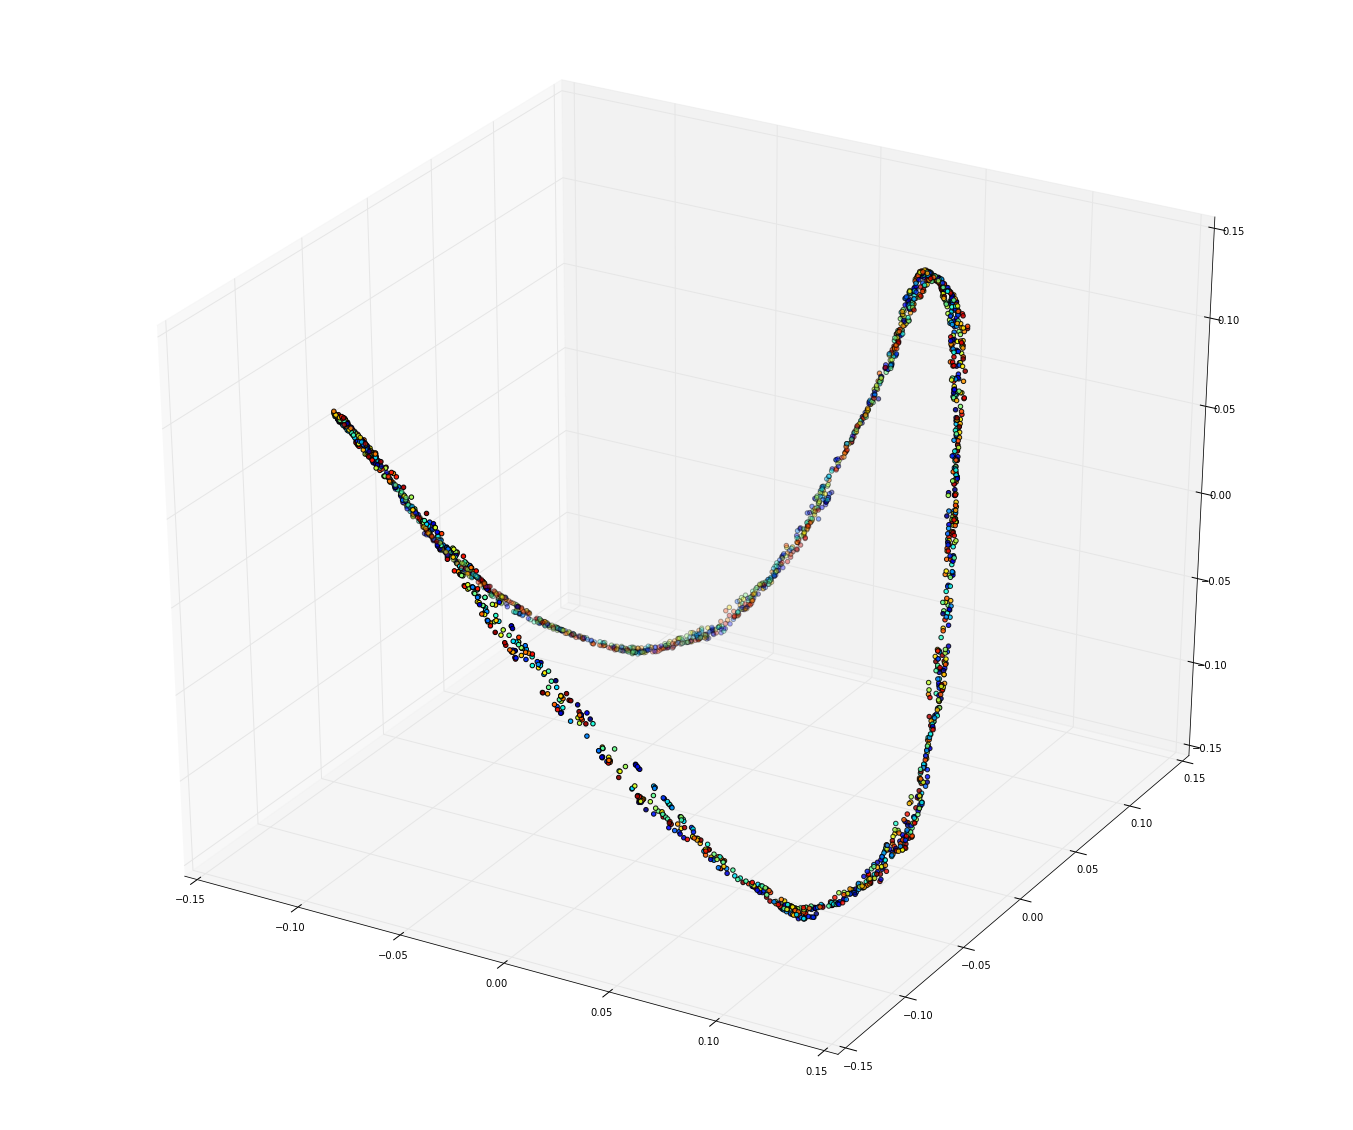

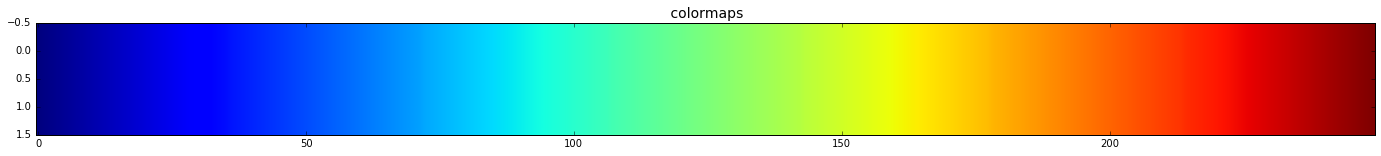

In [175]:
diffusion_params["gaussian_epsilon"] = 0.2 ## width of Gaussian kernel.
run_diffusion_maps_time_slices_plot_3d()

## Out of curiosity, what happens if we use the Euclidean norm over time?

using num_neighbors  


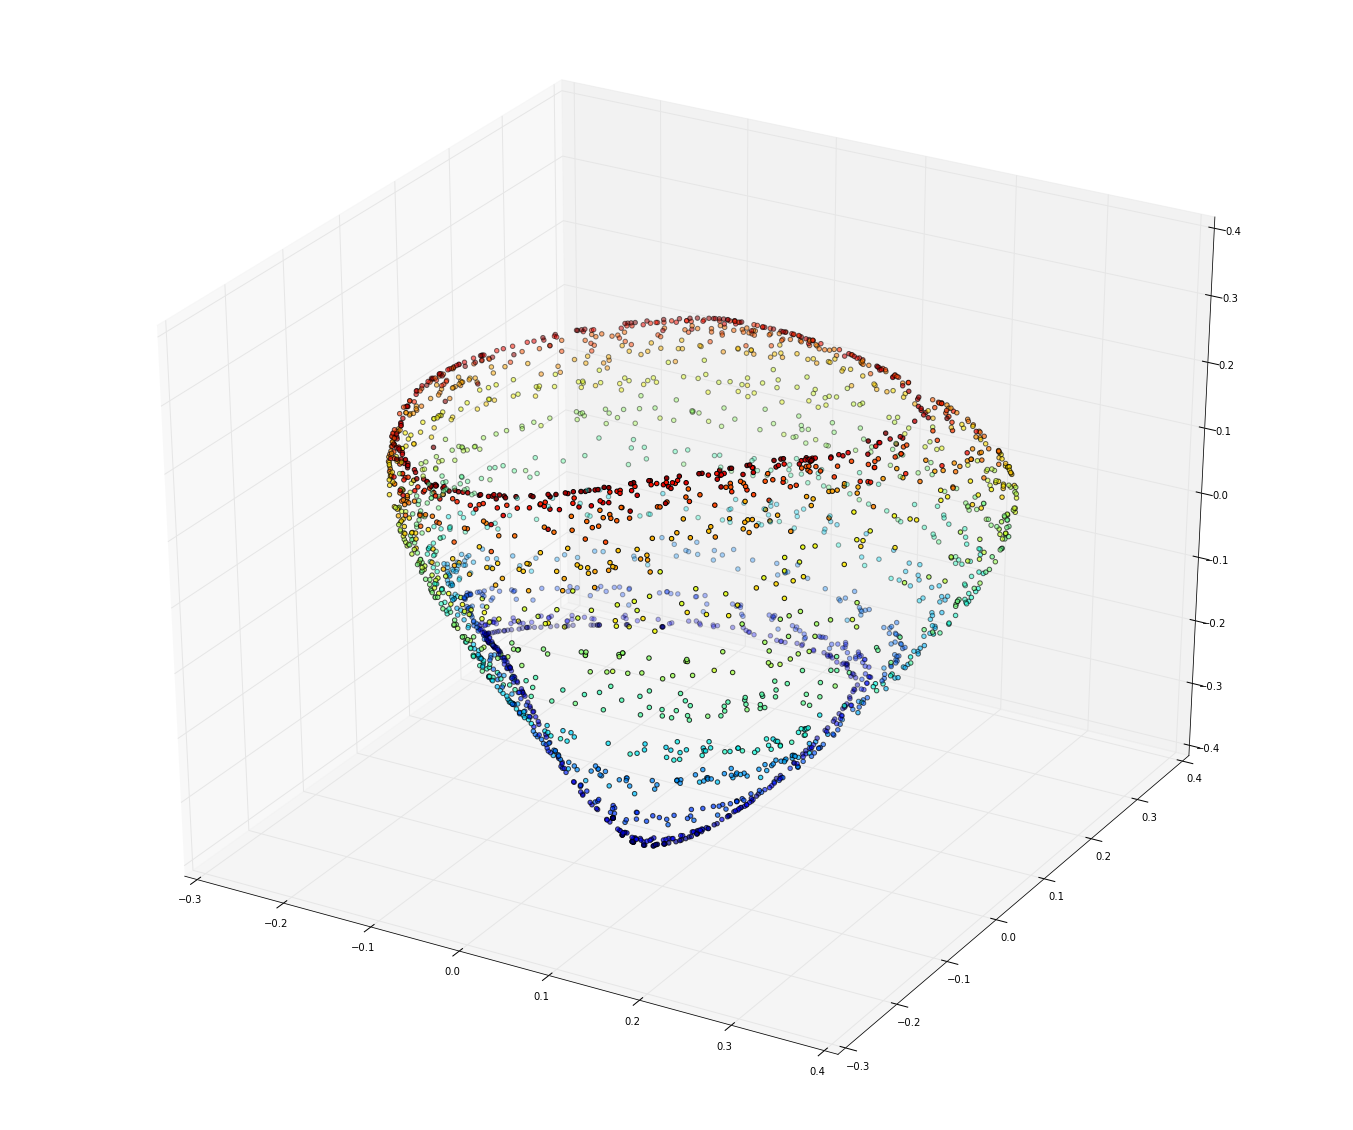

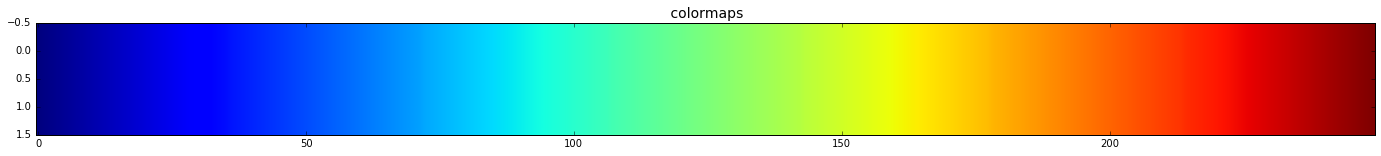

using num_neighbors  


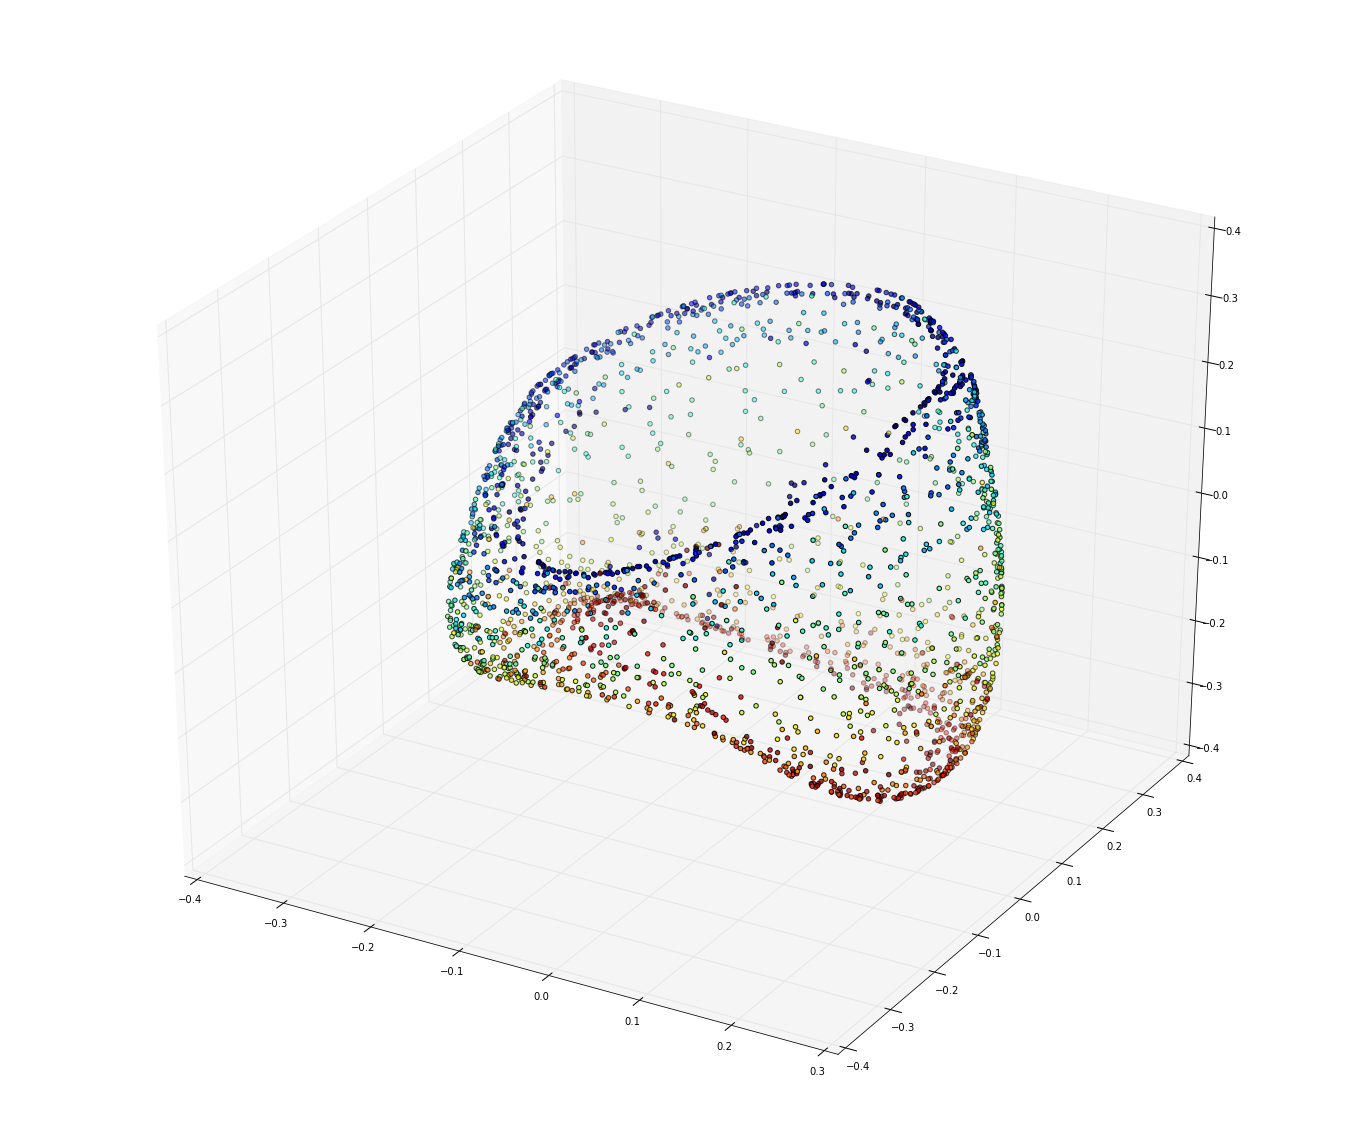

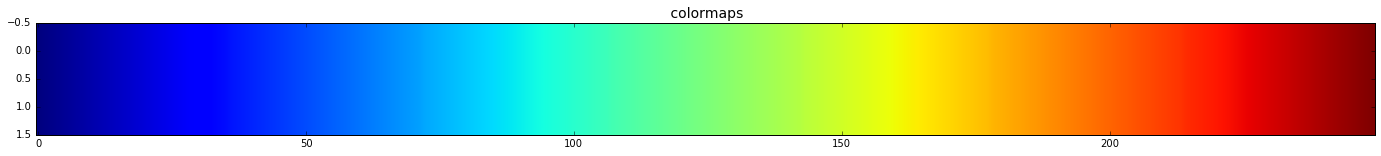

using num_neighbors  


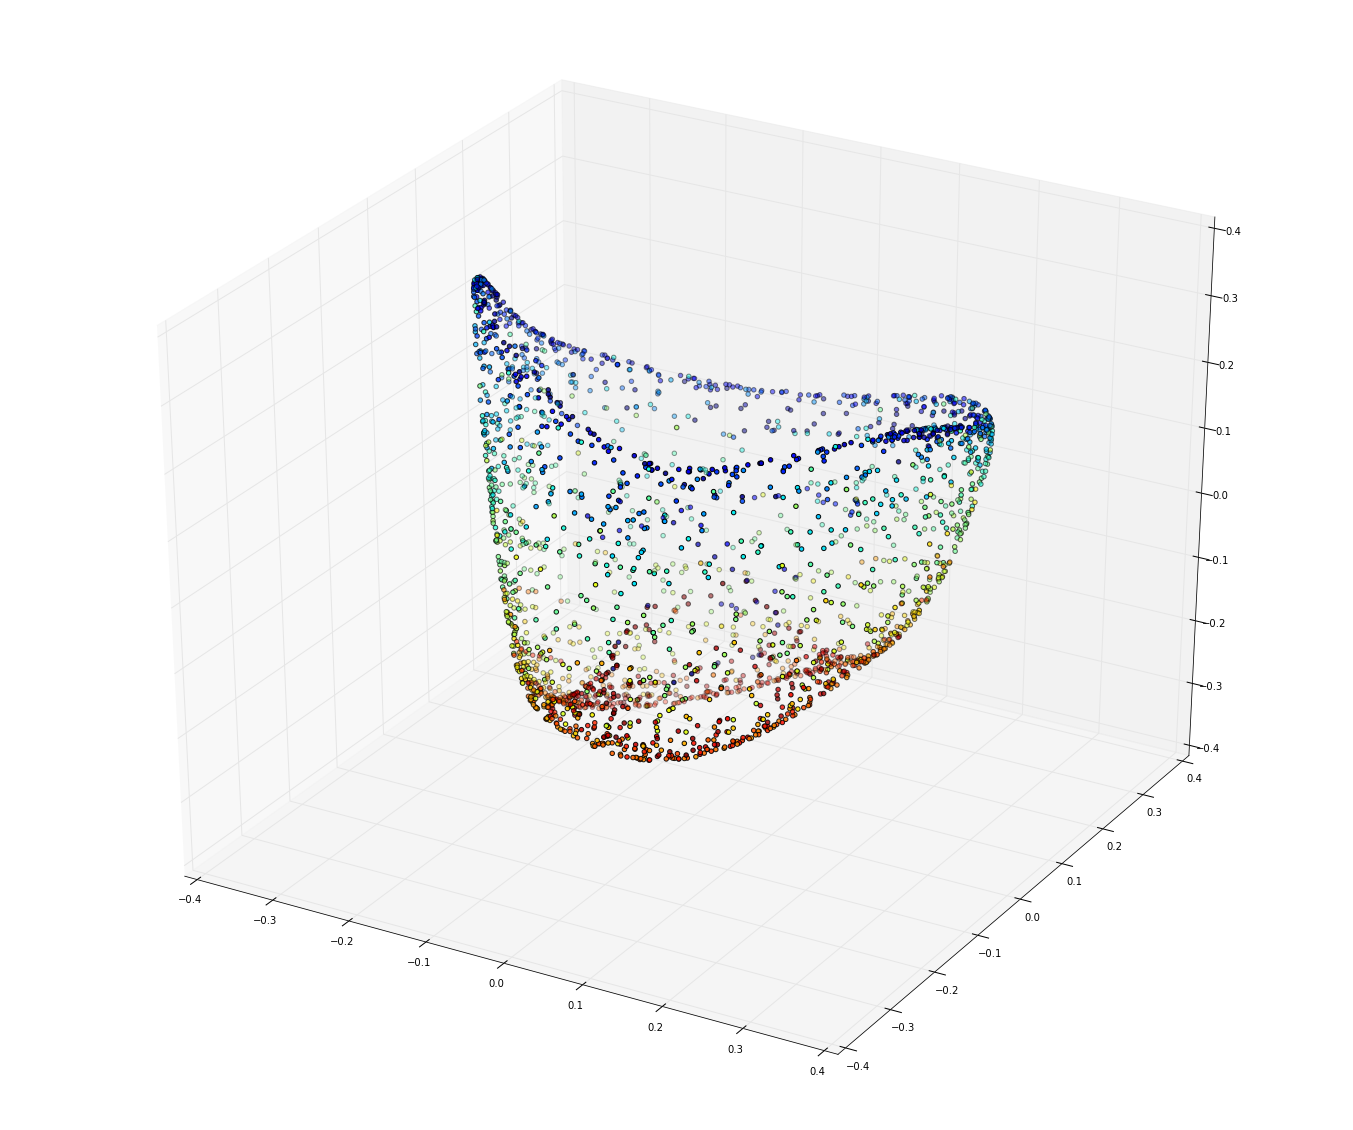

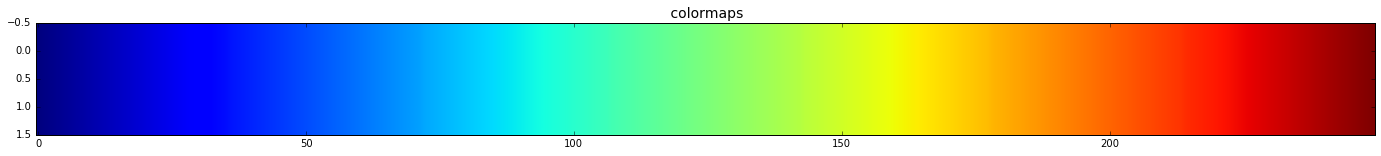

using num_neighbors  


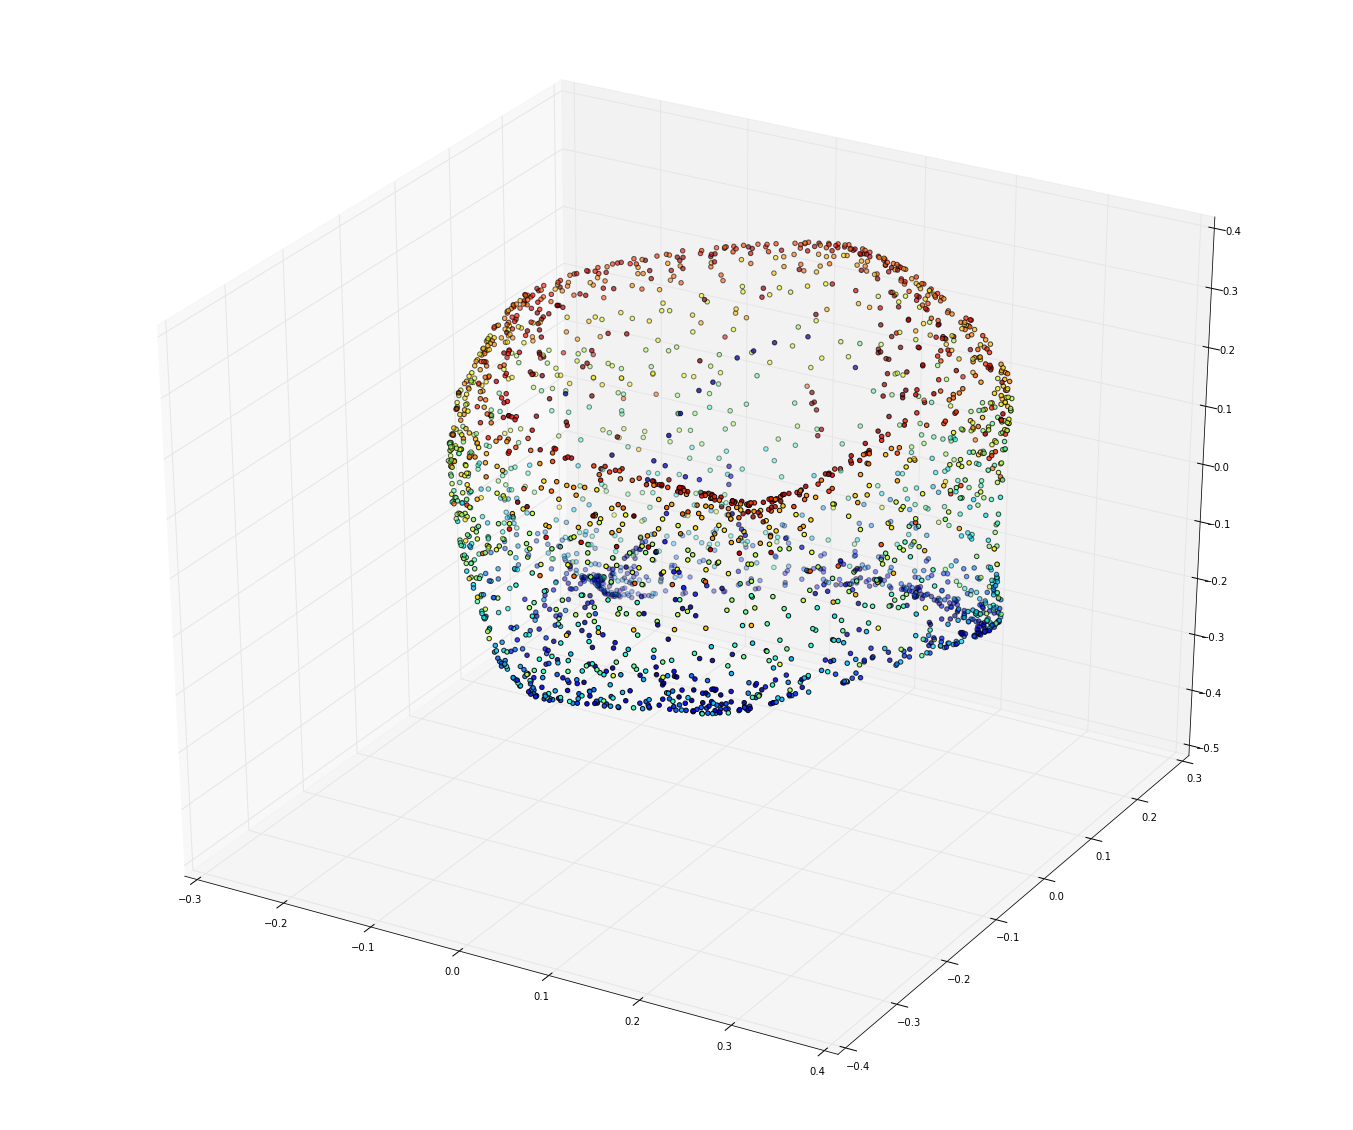

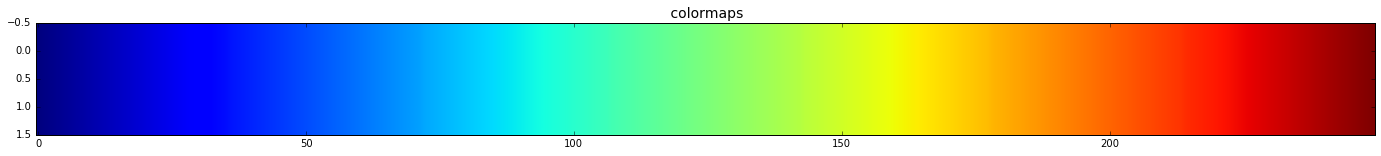

using num_neighbors  


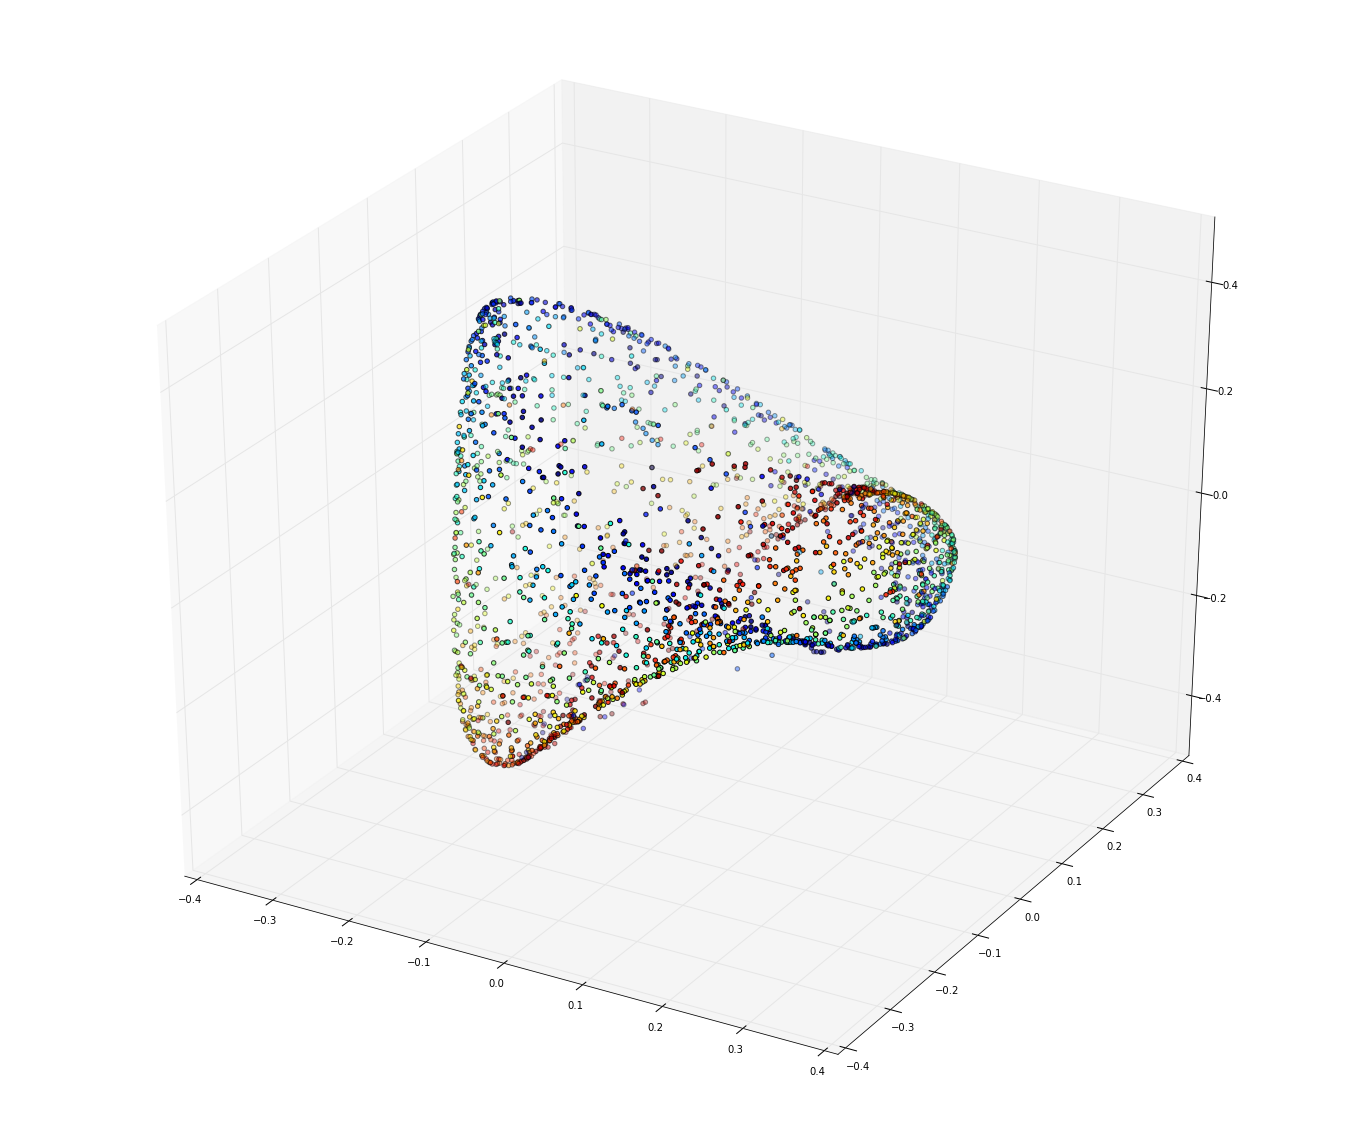

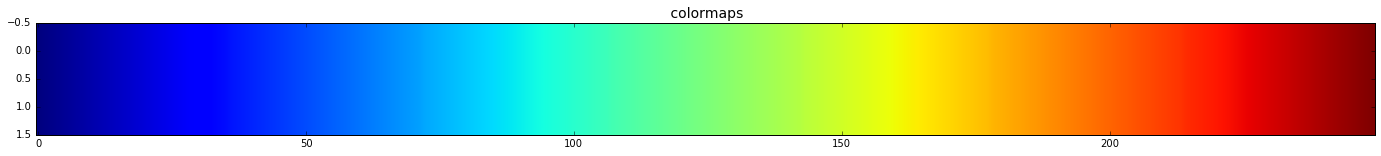

In [185]:
diffusion_params["gaussian_epsilon"] = 0.2 ## width of Gaussian kernel.
run_diffusion_maps_time_slices_plot_3d(metric="euclidean")

## 2D plots below with different values of `gaussian_epsilon`.

In [177]:
def run_diffusion_maps_time_slices_plot_2d():
    diffusion_params["eigen_dims"] = 3 ## number of lower dimensions to consider, i.e. number of eigenvectors to find.

    for t,traj1 in enumerate(traj_overtime):
        e_vals, e_vecs = run_diffusion_map(traj1.tolist(),
                                           diffusion_params,
                                           symmetric=True,
                                           metric = "FS_metric",
                                           neighbor_selection = "num_neighbors")

        data = e_vecs.T[1:]

        ## figure
        plt.scatter(*data) 
        plt.show()

using num_neighbors  


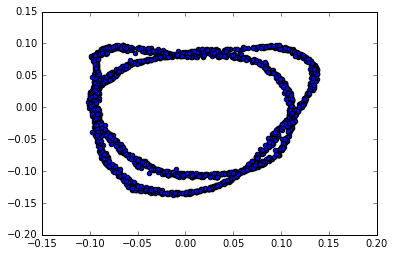

using num_neighbors  


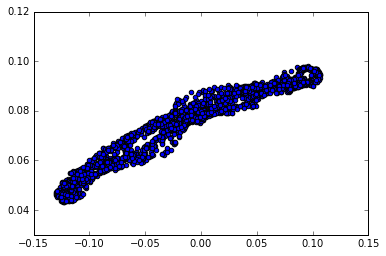

using num_neighbors  


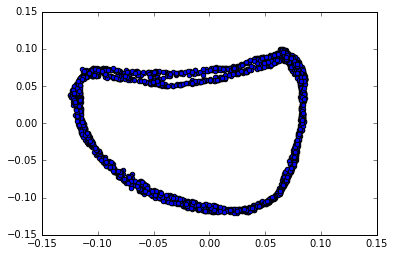

using num_neighbors  


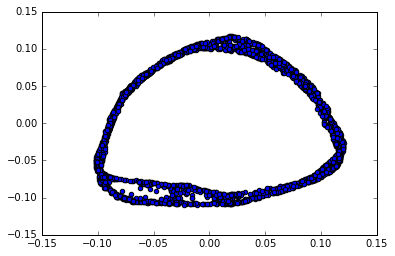

using num_neighbors  


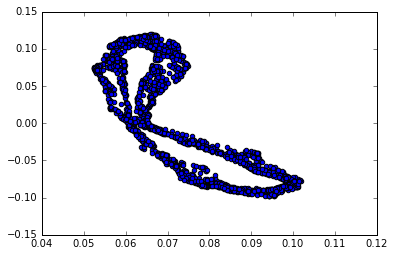

In [169]:
diffusion_params["gaussian_epsilon"] = 0.1 ## width of Gaussian kernel.
run_diffusion_maps_time_slices_plot_2d()

using num_neighbors  


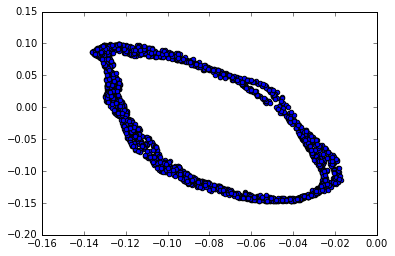

using num_neighbors  


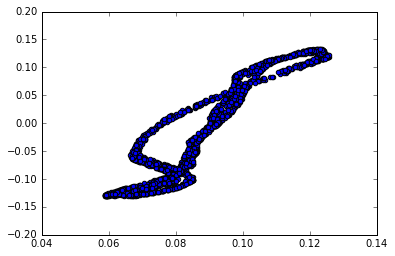

using num_neighbors  


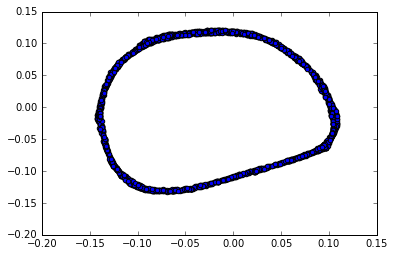

using num_neighbors  


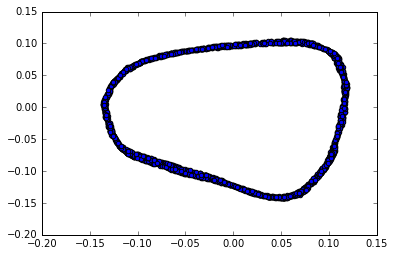

using num_neighbors  


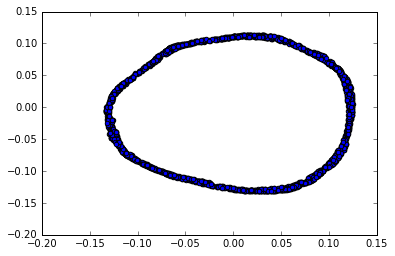

In [178]:
diffusion_params["gaussian_epsilon"] = 0.2 ## width of Gaussian kernel.
run_diffusion_maps_time_slices_plot_2d()

# Comments:

## We have shown that using the FS metric, the underlying geometry of a Kerr in the qubit limit can be found. We demonstrated that this geometry results in a circle. This result is consistent with the torus obtained by using the Euclidean geometry, since it is the Hopf fibration corresponding to a circle in the Bloch sphere. In particular, this is the equatorial circle with respect to the 0 and 1 states. The steady state over many trajectories must result in this cricle since the density matrix in steady state becomes a mixture of 0 and 1 states.

## The advantage of using this example is that we can gain intuition as to how diffusion maps will behave on the quantum states with the metric given by the Fubini Study norm. In particular, the value chosen for the `gaussian_epsilon`, and either the `num_neighbors` or the `epsilon_cutoff` (depending on the mode of the diffusion map algorithm)  may be important.